In [60]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [61]:
# creating dataframes from results files
df_heuristic = pd.read_csv('./results/new_results_heuristic.csv', index_col='Unnamed: 0')
df_RL_TF_5 = pd.read_csv('./results/updated_results_RL_TL_5.csv', index_col='Unnamed: 0')
df_RL_TF_10 = pd.read_csv('./results/updated_results_RL_TL_10.csv', index_col='Unnamed: 0')
df_RL_TF_15 = pd.read_csv('./results/updated_results_RL_TL_15.csv', index_col='Unnamed: 0')

In [62]:
# combining all datasets and meaning

df = pd.concat([df_heuristic, df_RL_TF_5, df_RL_TF_10, df_RL_TF_15], axis = 1, keys=('heuristic', 'TF_5', 'TF_10', 'TF_15'))
for agent in ['TF_5', 'TF_10', 'TF_15']:
    df[(agent, 'no_reason')] = 1 - (df[(agent, 'blocked_continuous')] + df[(agent, 'blocked_contiguous')])
    df[(agent, 'contiguous_normalised')] = df[(agent, 'blocked_contiguous')].divide(1-df[(agent, 'no_reason')])
    df[(agent, 'continuous_normalised')] = df[(agent, 'blocked_continuous')].divide(1-df[(agent, 'no_reason')])
df[('heuristic', 'no_reason')] = pd.Series(np.zeros(df[('heuristic', 'bp')].shape[0]))
df = df.fillna(0)
df_meaned = df.groupby(('heuristic' ,'traffic_load')).mean()
# for agent in ['TF_5', 'TF_10', 'TF_15']:
    

In [63]:
df_meaned

heuristic                                \
                                 bp avg_length blocked_continuous   
(heuristic, traffic_load)                                           
5.0                        0.000000   1.430000           0.000000   
5.5                        0.000000   1.430000           0.000000   
6.0                        0.000000   1.425000           0.000000   
6.5                        0.000000   1.425000           0.000000   
7.0                        0.000000   1.425000           0.000000   
7.5                        0.000000   1.425000           0.000000   
8.0                        0.000000   1.425000           0.000000   
8.5                        0.000000   1.425000           0.000000   
9.0                        0.000000   1.443333           0.000000   
9.5                        0.028333   1.433772           0.000000   
10.0                       0.041667   1.434737           0.000000   
10.5                       0.060000   1.434795           0.000000   
11.0                       0.060000   1.436647           0.000000   
11.5                       0.061667   1.435667           0.000000   
12.0                       0.071667   1.447753           0.000000   
12.5                       0.095000   1.433035           0.233333   
13.0                       0.080000   1.449891           0.050000   
13.5                       0.105000   1.441753           0.038889   
14.0                       0.105000   1.441753           0.038889   
14.5                       0.130000   1.425912           0.033333   
15.0                       0.130000   1.425912           0.033333   
15.5                       0.130000   1.425912           0.033333   
16.0                       0.130000   1.425912           0.033333   
16.5                       0.150000   1.411955           0.163889   
17.0                       0.150000   1.411955           0.163889   
17.5                       0.150000   1.411955           0.163889   
18.0                       0.150000   1.411955           0.163889   
18.5                       0.150000   1.411955           0.163889   
19.0                       0.150000   1.433647           0.163889   
19.5                       0.155000   1.436220           0.180556   
20.0                       0.155000   1.436220           0.180556   

                                                  TF_5             \
                          blocked_contiguous        bp avg_length   
(heuristic, traffic_load)                                           
5.0                                 0.000000  0.135000   3.742478   
5.5                                 0.000000  0.136667   3.640329   
6.0                                 0.000000  0.130000   3.653771   
6.5                                 0.000000  0.155000   3.769544   
7.0                                 0.000000  0.135000   3.706462   
7.5                                 0.000000  0.150000   3.710054   
8.0                                 0.000000  0.156667   3.805360   
8.5                                 0.000000  0.171667   3.828475   
9.0                                 0.000000  0.160000   3.792089   
9.5                                 0.566667  0.200000   3.931995   
10.0                                0.833333  0.200000   3.930780   
10.5                                1.000000  0.226667   4.043582   
11.0                                1.000000  0.225000   4.068098   
11.5                                1.000000  0.255000   4.179513   
12.0                                1.000000  0.253333   4.186836   
12.5                                0.766667  0.281667   4.336693   
13.0                                0.950000  0.283333   4.370151   
13.5                                0.961111  0.311667   4.434425   
14.0                                0.961111  0.306667   4.411868   
14.5                                0.966667  0.328333   4.552026   
15.0                                0.966667  0.325000   4.546871   
15.5                   

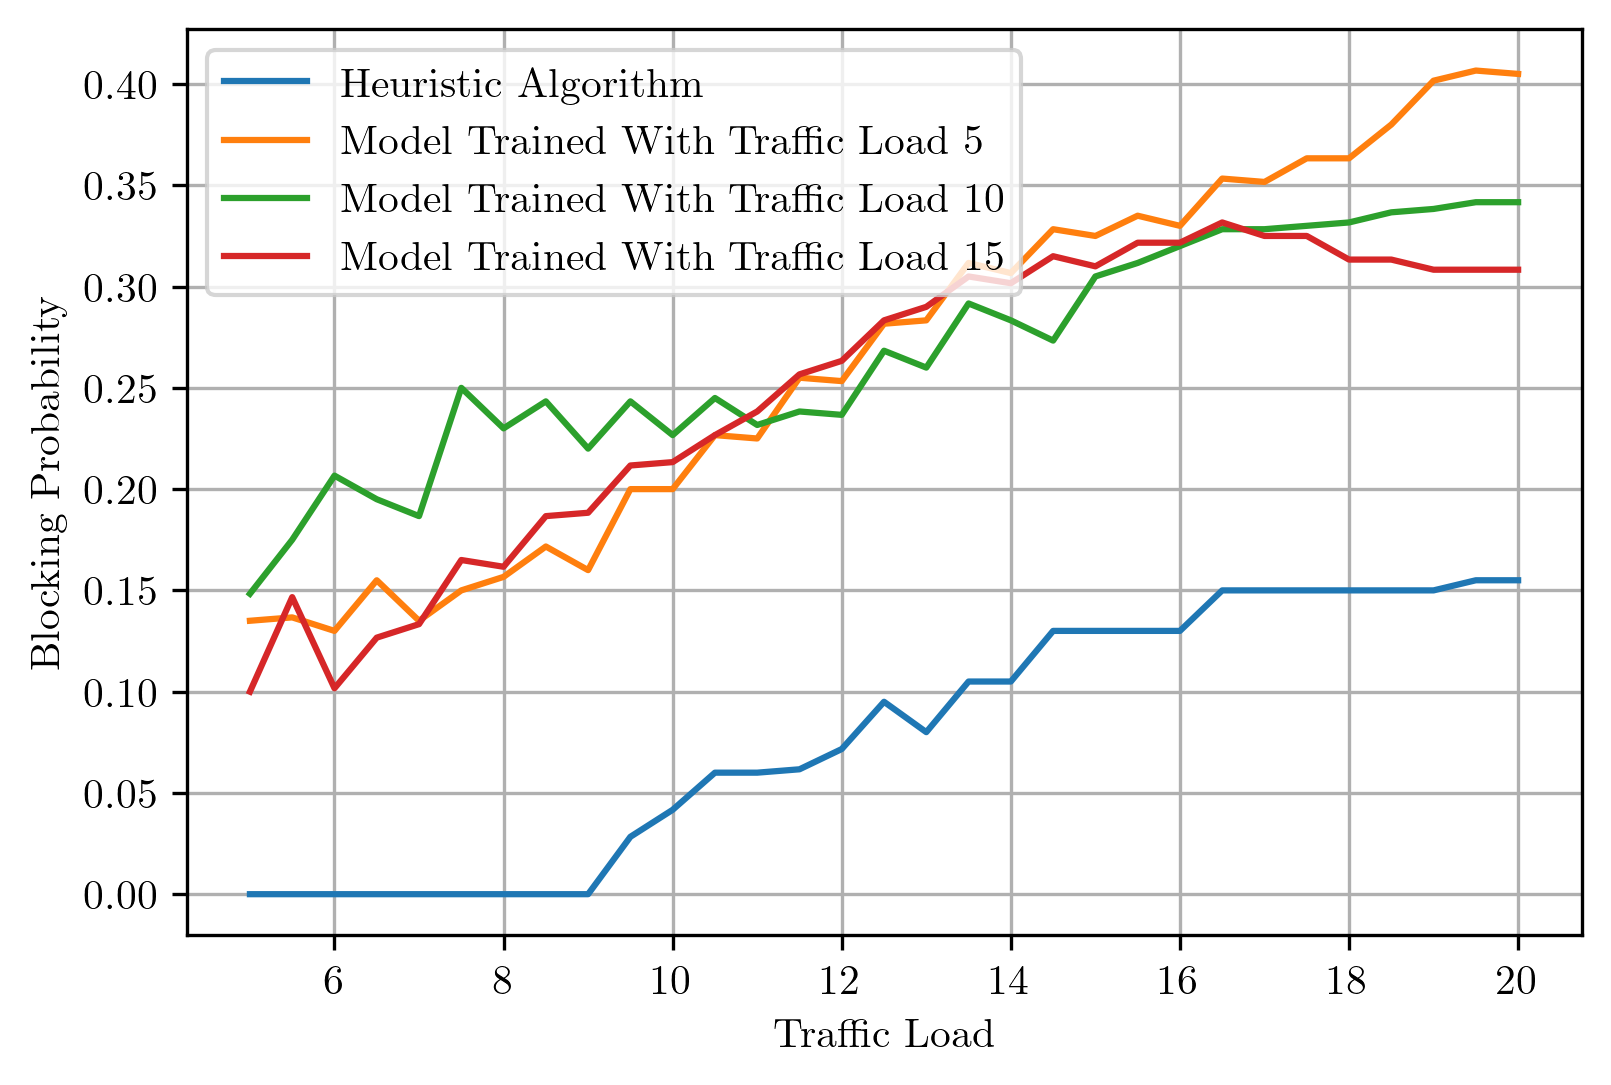

In [64]:
# blocking probability vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'bp'), ('TF_5', 'bp'), ('TF_10', 'bp'), ('TF_15', 'bp')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/bp_vs_traffic_load.pgf', format='pgf')

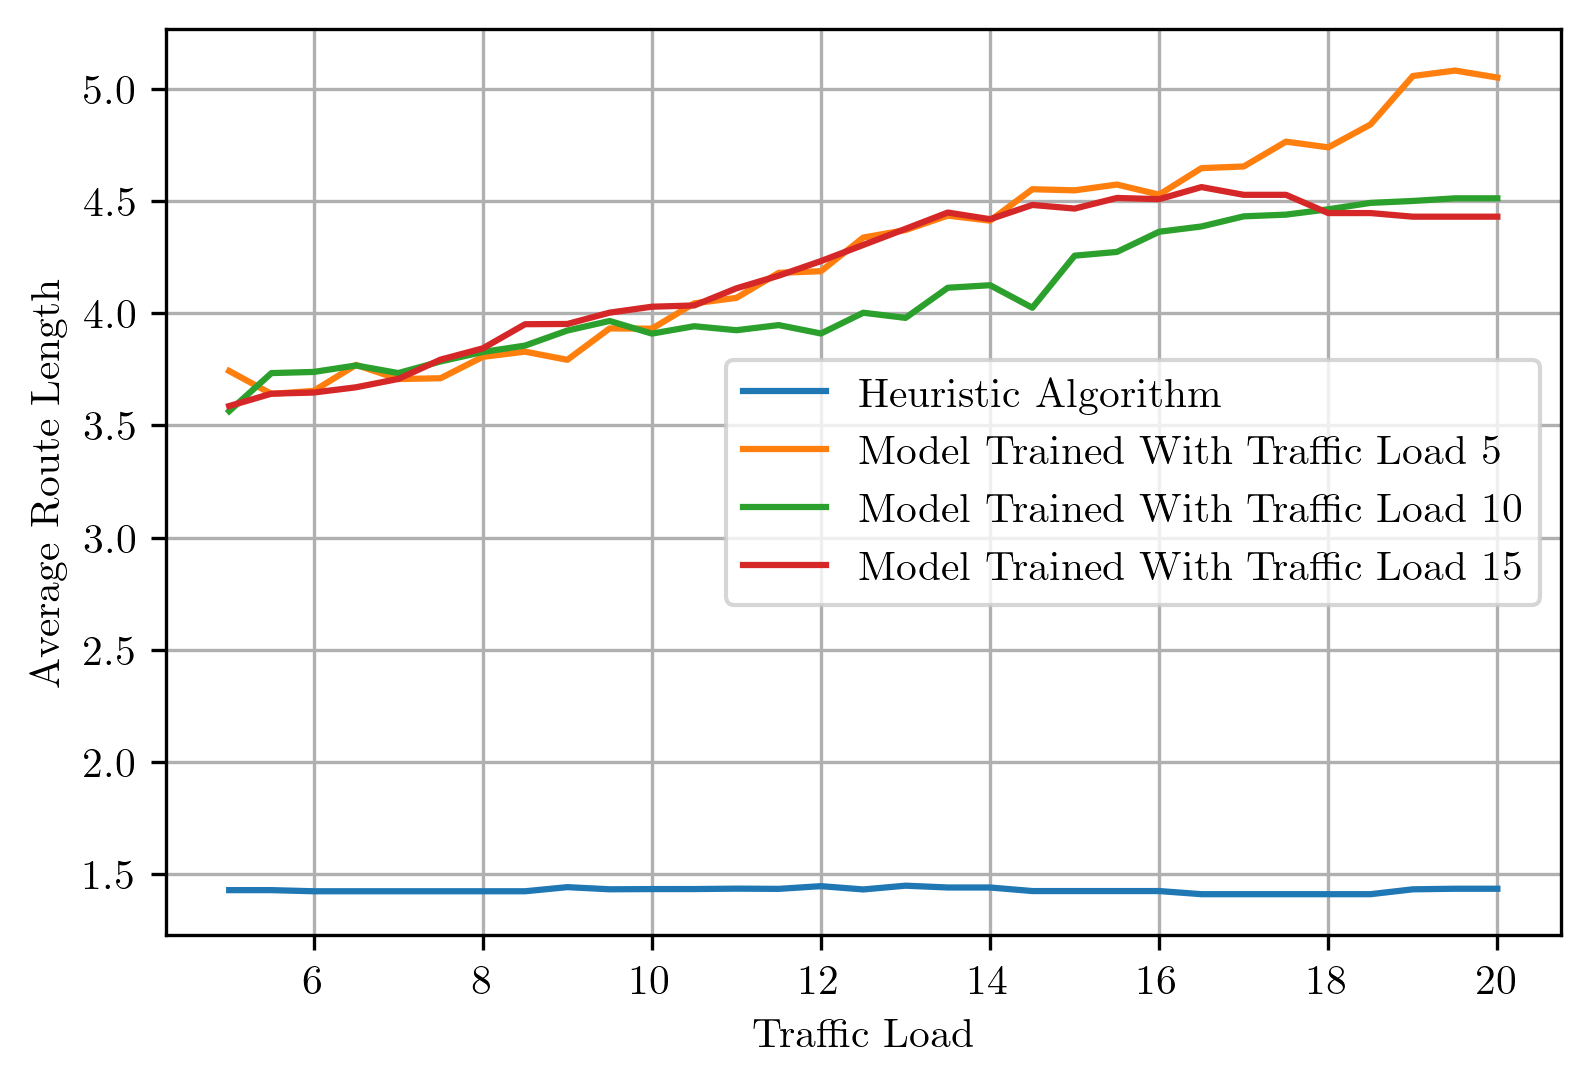

In [65]:
# route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'avg_length'), ('TF_5', 'avg_length'), ('TF_10', 'avg_length'), ('TF_15', 'avg_length')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Average Route Length')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/length_vs_traffic_load.pgf', format='pgf')

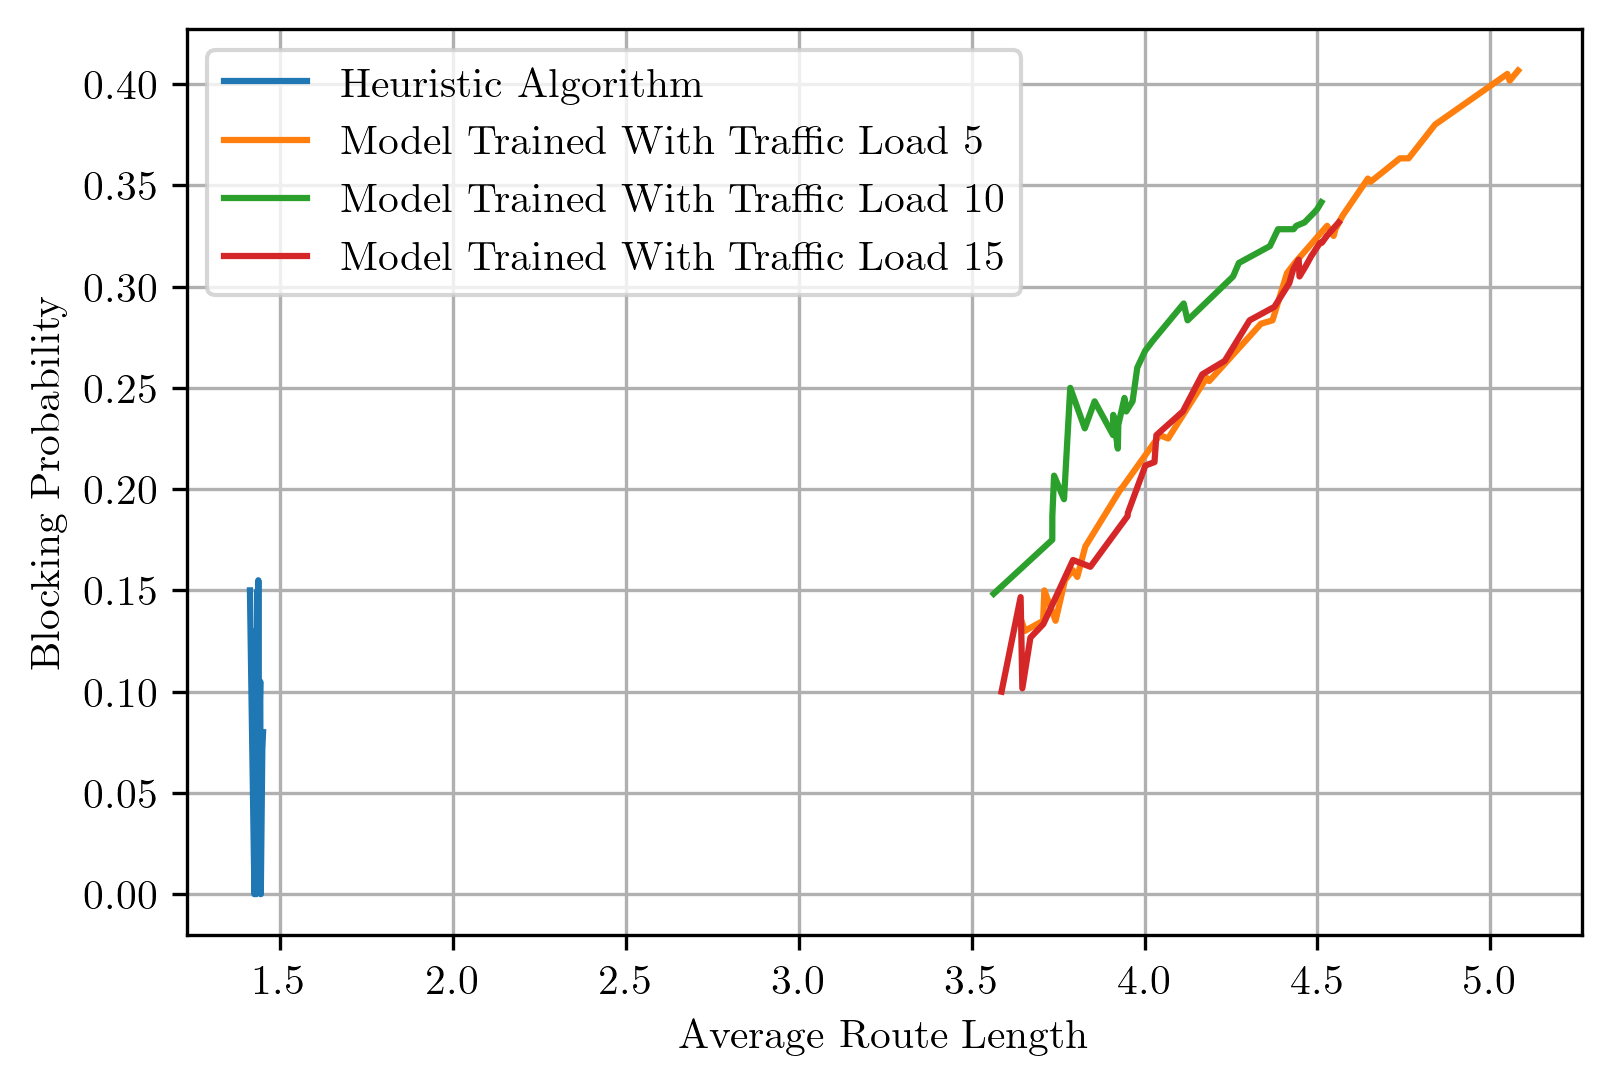

In [66]:
# route length vs blocking probability

fig, ax = plt.subplots(dpi=300)

agents = ['heuristic', 'TF_5', 'TF_10', 'TF_15']
for i in range(len(agents)):
    df_plot = df_meaned[[(agents[i], 'avg_length'), (agents[i], 'bp')]].sort_values(by=(agents[i], 'avg_length'))
    df_plot.plot(
        x=(agents[i], 'avg_length'),
        y=(agents[i], 'bp'),
        ax = ax,
        grid=True,
    )

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Average Route Length')
# plt.show()
plt.savefig('./figures/length_vs_bp.pgf', format='pgf')


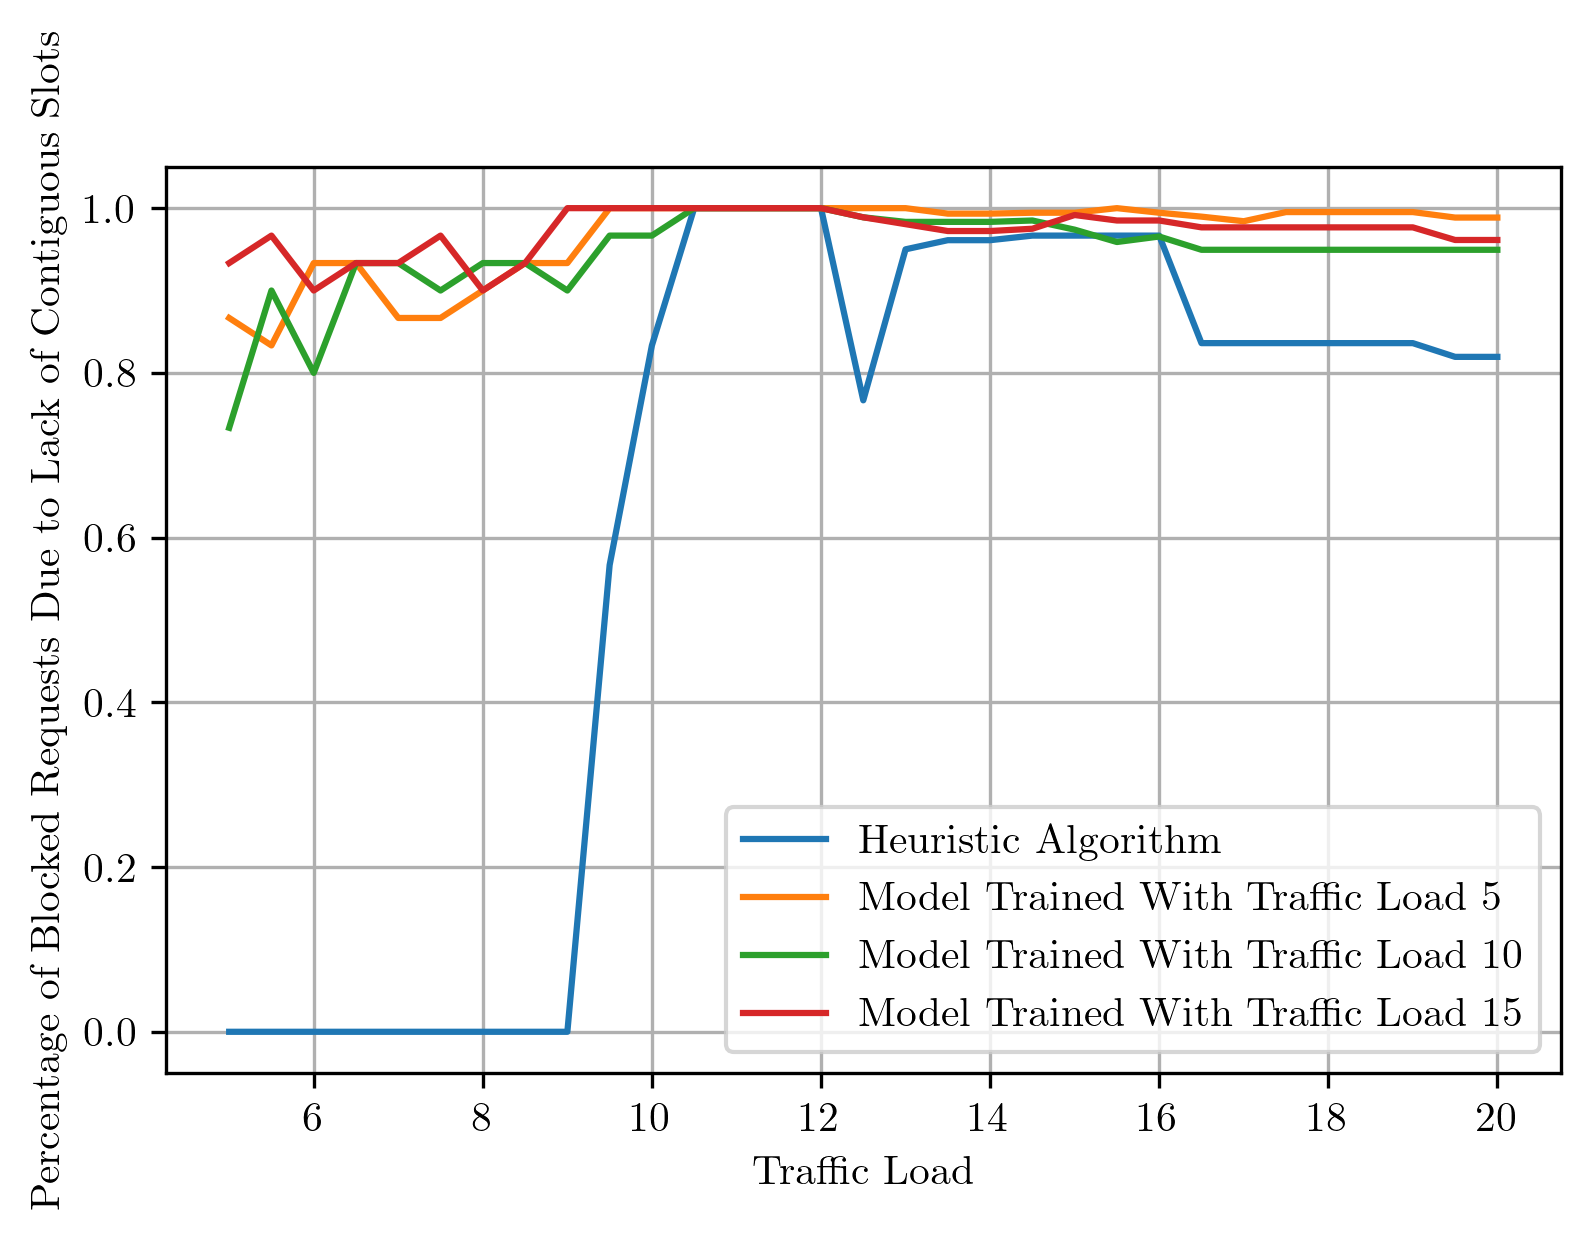

In [67]:
# contiguous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_contiguous'), ('TF_5', 'contiguous_normalised'), ('TF_10', 'contiguous_normalised'), ('TF_15', 'contiguous_normalised')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage of Blocked Requests Due to Lack of Contiguous Slots')

# plt.show()
plt.savefig('./figures/bp_contiguous vs traffic load.pgf', format='pgf')

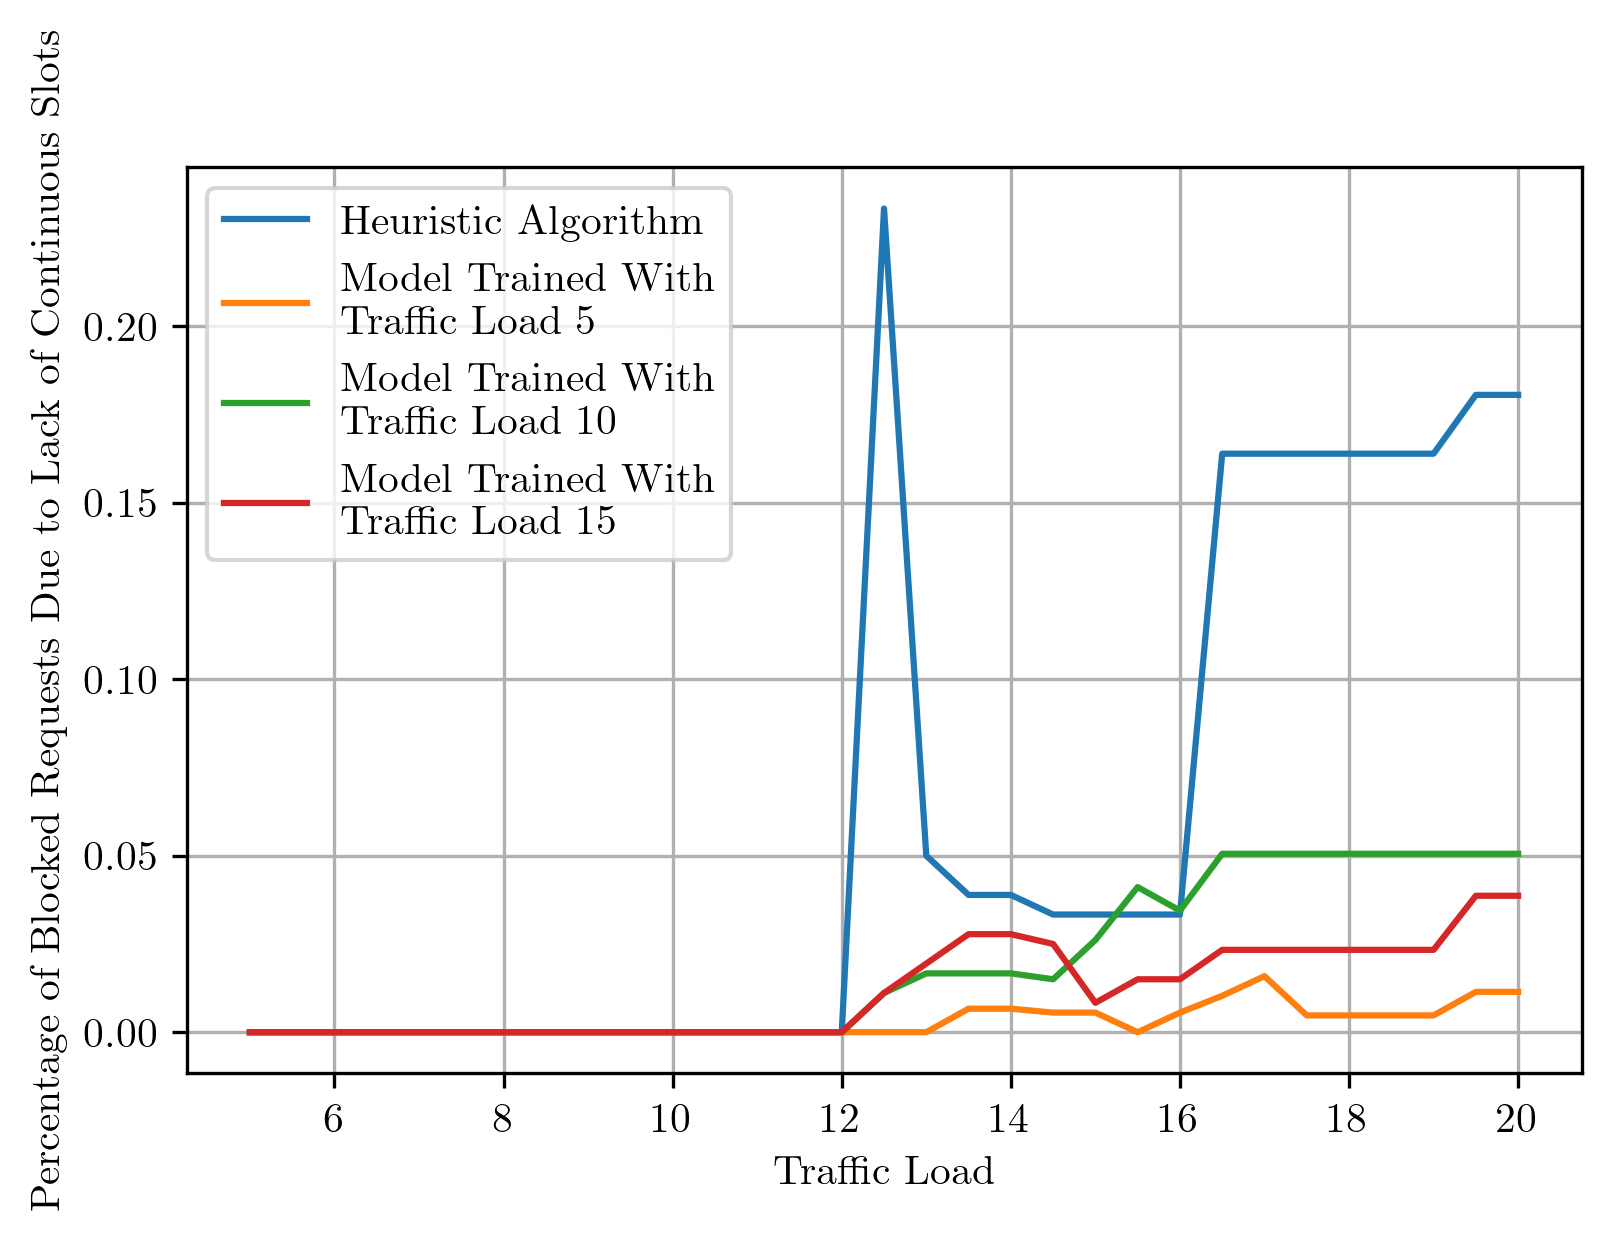

In [68]:
# continuous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_continuous'), ('TF_5', 'continuous_normalised'), ('TF_10', 'continuous_normalised'), ('TF_15', 'continuous_normalised')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With \n Traffic Load 5', 'Model Trained With \n Traffic Load 10', 'Model Trained With \n Traffic Load 15'], loc='upper left')
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage of Blocked Requests Due to Lack of Continuous Slots')

# plt.show()
plt.savefig('./figures/bp_continuous vs traffic load.pgf', format='pgf')

In [69]:
# finding requests blocked for no reason
df_bp = pd.DataFrame()
agents = ['heuristic', 'TF_5', 'TF_10', 'TF_15']

for agent in agents:
    df_bp[agent] = df[(agent, 'no_reason')]

In [70]:
df_bp['traffic_load'] = df[('heuristic', 'traffic_load')]

In [71]:
df_bp = df_bp.groupby('traffic_load').mean()

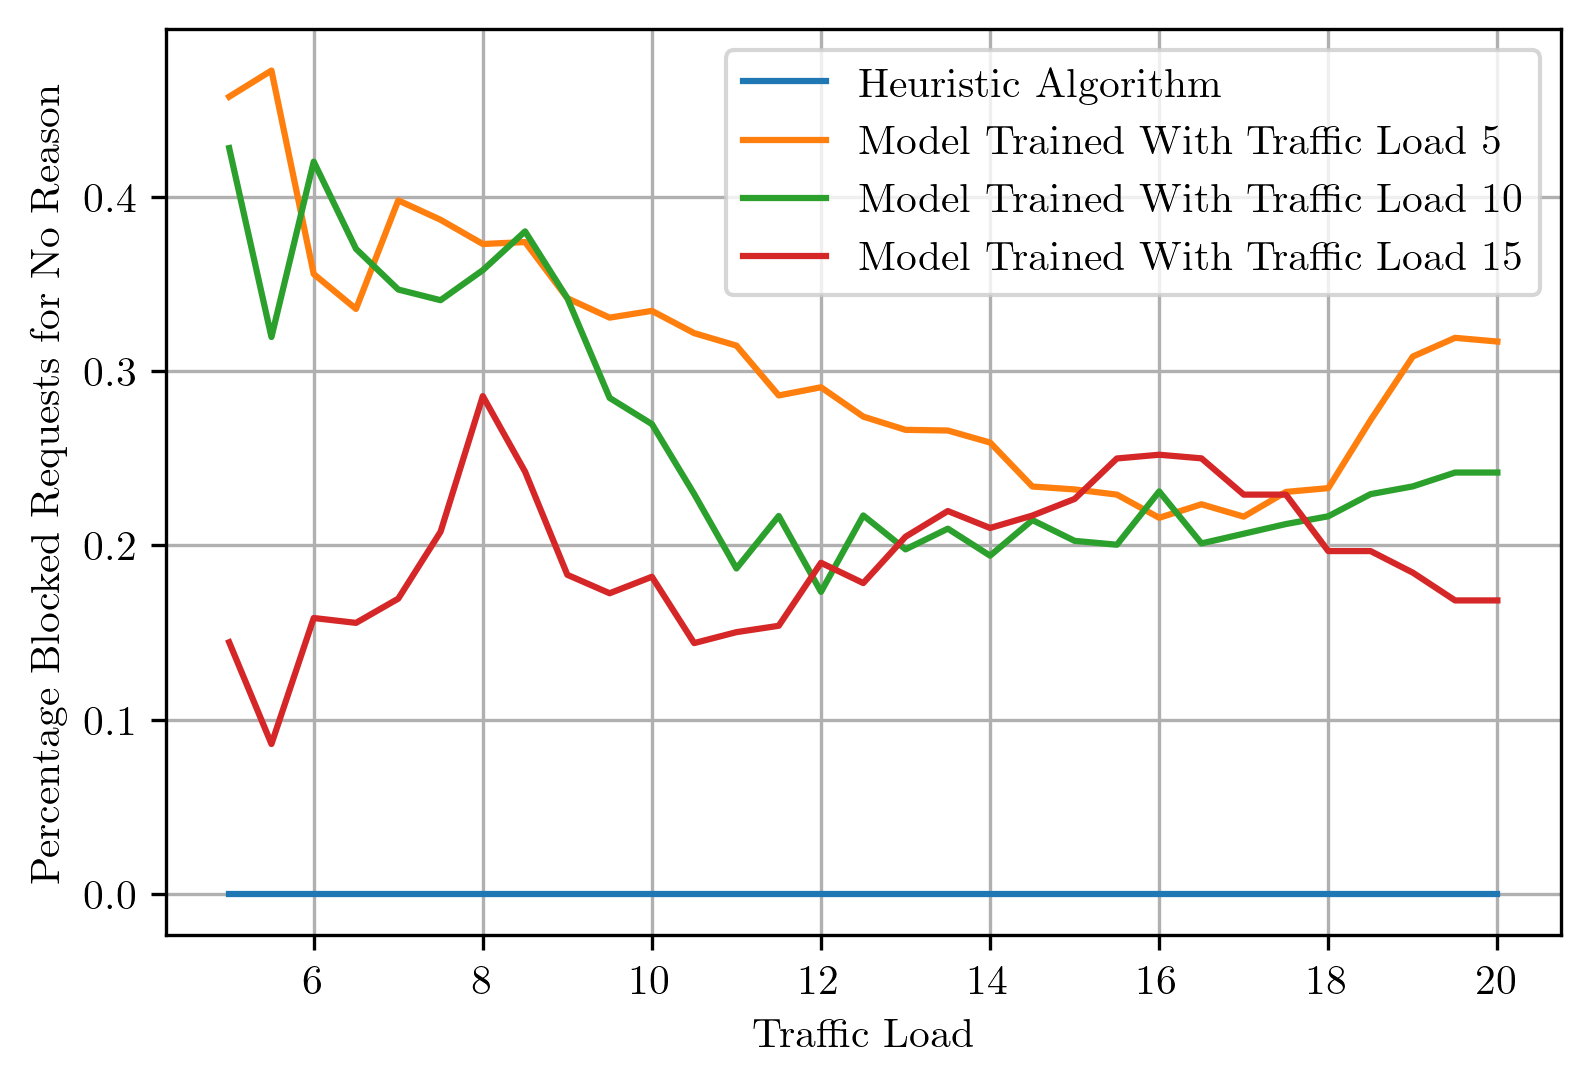

In [72]:
fig, ax = plt.subplots(dpi=300)


df_bp.plot(
    y=agents,
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage Blocked Requests for No Reason')

# plt.show()
plt.savefig('./figures/bp_no_reason vs traffic load.pgf', format='pgf')

In [73]:
df_5_new = pd.read_csv('./results/updated_results_RL_TL_5.csv')
df_5_new['no_reason'] = 1 - df_5_new['blocked_continuous'] - df_5_new['blocked_contiguous']

<AxesSubplot:xlabel='traffic_load'>

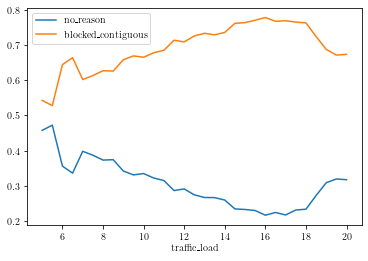

In [74]:
df_5_new.groupby('traffic_load').mean().plot(
    y=['no_reason', 'blocked_contiguous']
)

In [75]:
df_new_heuristic = pd.read_csv('results/new_results_heuristic.csv')

In [76]:
import numpy as np
df_heuristic_group = df_heuristic.loc[~(df==0.000000).all(axis=1)]
df_heuristic_group

,bp,avg_length,blocked_continuous,blocked_contiguous,traffic_load
0,0.00,1.450000,0.000000,0.000000,5.0
1,0.00,1.450000,0.000000,0.000000,5.0
2,0.00,1.450000,0.000000,0.000000,5.0
3,0.00,1.400000,0.000000,0.000000,5.0
4,0.00,1.450000,0.000000,0.000000,5.0
...,...,...,...,...,...
925,0.15,1.352941,0.333333,0.666667,20.0
926,0.15,1.470588,0.000000,1.000000,20.0
927,0.15,1.411765,0.333333,0.666667,20.0
928,0.15,1.352941,0.333333,0.666667,20.0


In [77]:
(df_new_heuristic['blocked_continuous'] + df_new_heuristic['blocked_contiguous']).unique()

array([0., 1.])

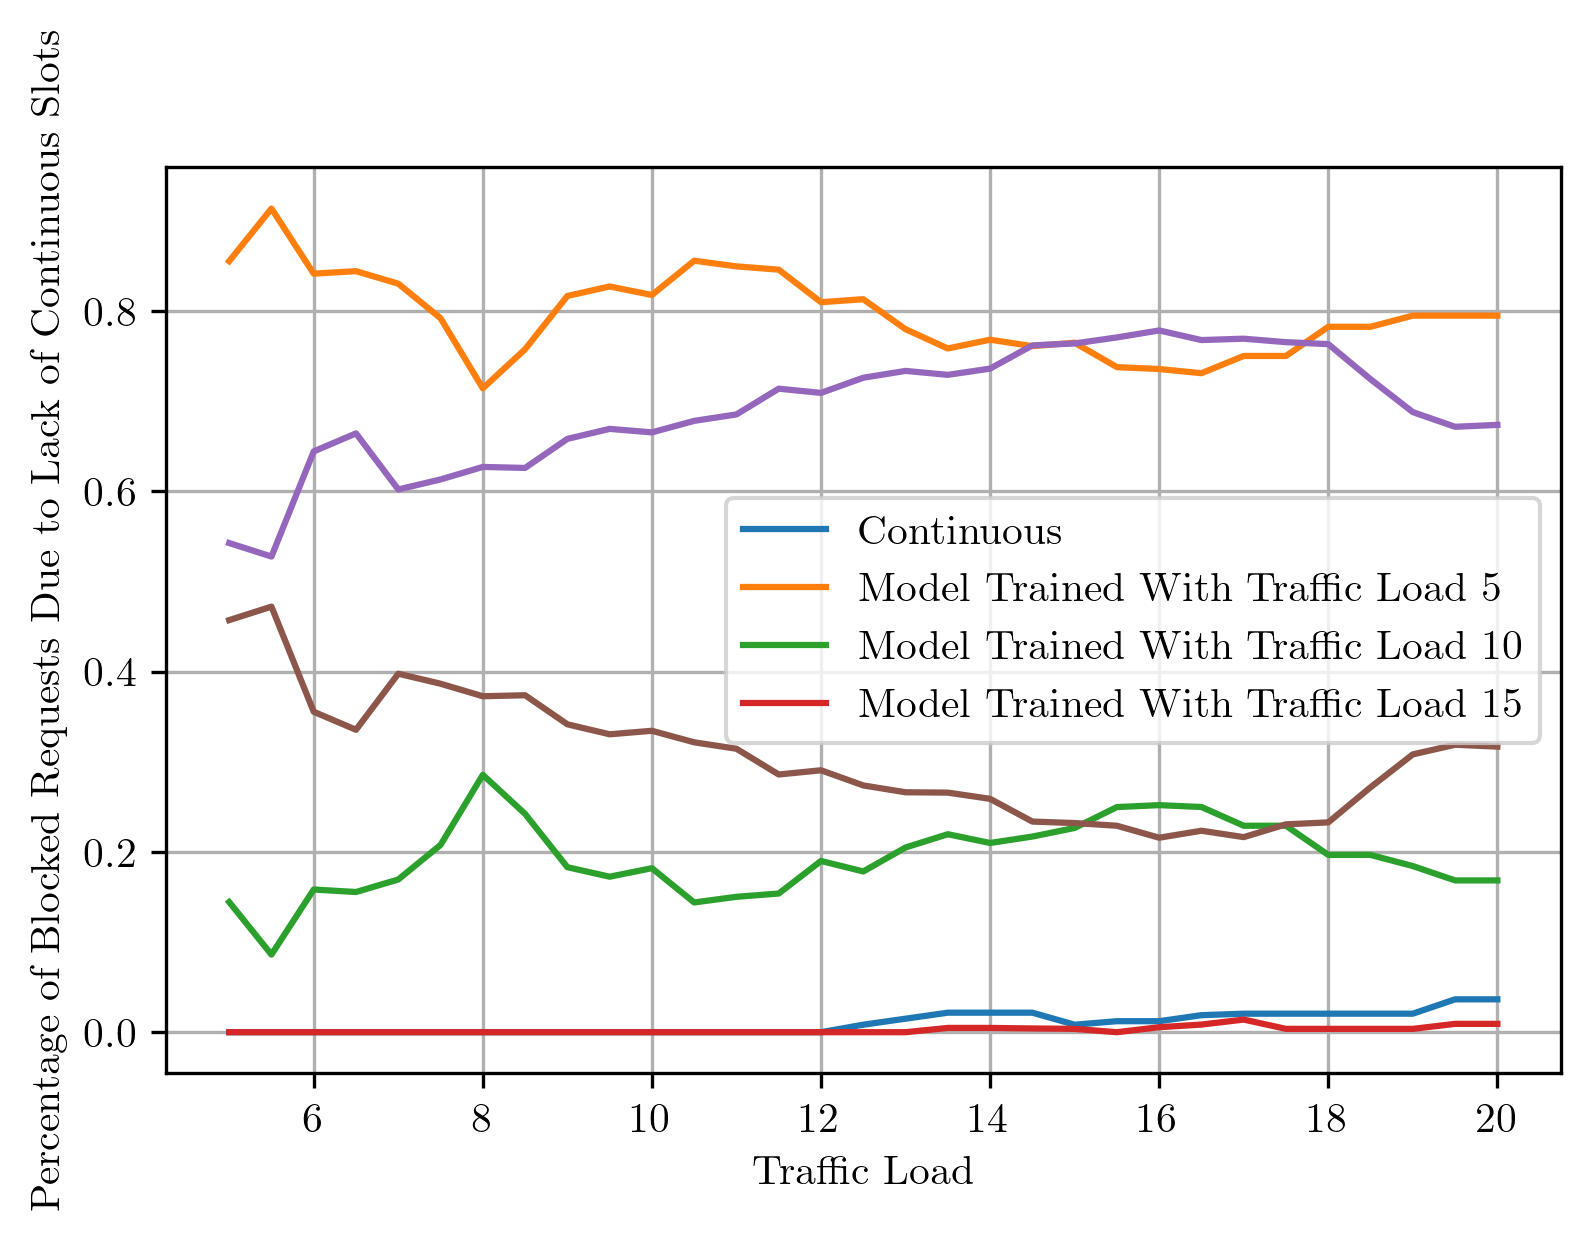

In [78]:
# continuous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('TF_15', 'blocked_continuous'), ('TF_15', 'blocked_contiguous'), ('TF_15', 'no_reason'), ('TF_5', 'blocked_continuous'), ('TF_5', 'blocked_contiguous'), ('TF_5', 'no_reason')],
    ax = ax,
    grid=True,
)

ax.legend(['Continuous', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage of Blocked Requests Due to Lack of Continuous Slots')

plt.show()
# plt.savefig('./figures/bp_continuous vs traffic load.pgf', format='pgf')

# New Requests

In [79]:
# creating dataframes from results files
df_heuristic = pd.read_csv('./results/new_results_heuristic.csv', index_col='Unnamed: 0')
df_RL_TF_5 = pd.read_csv('./results/updated_results_RL_TL_5.csv', index_col='Unnamed: 0')
df_RL_TF_10 = pd.read_csv('./results/updated_results_RL_TL_10.csv', index_col='Unnamed: 0')
df_RL_TF_15 = pd.read_csv('./results/updated_results_RL_TL_15.csv', index_col='Unnamed: 0')

# training graphs

In [80]:
df_TF_5 = pd.concat([
    pd.read_csv('./results/log graphs/TL5/TL5 average route length.csv')[['Step','Value']],
    pd.read_csv('./results/log graphs/TL5/TL5 bp.csv')['Value'],
    pd.read_csv('./results/log graphs/TL5/TL5 contiguous.csv')['Value'],
    pd.read_csv('./results/log graphs/TL5/TL5 continuous.csv')['Value'],
    pd.read_csv('./results/log graphs/TL5/TL5 mean episode length.csv')['Value'],
    pd.read_csv('./results/log graphs/TL5/TL5 mean reward.csv')['Value'],
    pd.read_csv('./results/log graphs/TL5/TL5 fps.csv')['Value'],
],
axis=1)

In [81]:
df_TF_10 = pd.concat([
    pd.read_csv('./results/log graphs/TL10/TL10 average route length.csv')[['Step','Value']],
    pd.read_csv('./results/log graphs/TL10/TL10 bp.csv')['Value'],
    pd.read_csv('./results/log graphs/TL10/TL10 contiguous.csv')['Value'],
    pd.read_csv('./results/log graphs/TL10/TL10 continuous.csv')['Value'],
    pd.read_csv('./results/log graphs/TL10/TL10 mean episode length.csv')['Value'],
    pd.read_csv('./results/log graphs/TL10/TL10 mean reward.csv')['Value'],
    pd.read_csv('./results/log graphs/TL10/TL10 fps.csv')['Value'],
],
axis=1)

In [82]:
df_TF_15 = pd.concat([
    pd.read_csv('./results/log graphs/TL15/TL15 average route length.csv')[['Step','Value']],
    pd.read_csv('./results/log graphs/TL15/TL15 bp.csv')['Value'],
    pd.read_csv('./results/log graphs/TL15/TL15 contiguous.csv')['Value'],
    pd.read_csv('./results/log graphs/TL15/TL15 continuous.csv')['Value'],
    pd.read_csv('./results/log graphs/TL15/TL15 mean episode length.csv')['Value'],
    pd.read_csv('./results/log graphs/TL15/TL15 mean reward.csv')['Value'],
    pd.read_csv('./results/log graphs/TL15/TL15 fps.csv')['Value'],
],
axis=1)

In [83]:
df_TF_5.columns = ['Step', 'avg route length', 'bp', 'contiguous', 'continuous', 'mean length', 'mean reward', 'fps']
df_TF_10.columns = ['Step', 'avg route length', 'bp', 'contiguous', 'continuous', 'mean length', 'mean reward', 'fps']
df_TF_15.columns = ['Step', 'avg route length', 'bp', 'contiguous', 'continuous', 'mean length', 'mean reward', 'fps']

In [84]:
df_TF_5['episode time'] = df_TF_5['mean length'].divide(df_TF_5['fps'])
df_TF_10['episode time'] = df_TF_10['mean length'].divide(df_TF_10['fps'])
df_TF_15['episode time'] = df_TF_15['mean length'].divide(df_TF_15['fps'])

In [85]:
df_TF_5['bp rolling'] = df_TF_5['bp'].rolling(window=20).mean()
df_TF_10['bp rolling'] = df_TF_10['bp'].rolling(window=20).mean()
df_TF_15['bp rolling'] = df_TF_15['bp'].rolling(window=20).mean()

In [86]:
df_TF_5['avg route length rolling'] = df_TF_5['avg route length'].rolling(window=20).mean()
df_TF_10['avg route length rolling'] = df_TF_10['avg route length'].rolling(window=20).mean()
df_TF_15['avg route length rolling'] = df_TF_15['avg route length'].rolling(window=20).mean()

In [87]:
df_training = pd.concat([df_TF_5, df_TF_10, df_TF_15], axis = 1, keys=('TF_5', 'TF_10', 'TF_15'))

In [88]:
df_training

TF_5                                                             \
         Step avg route length    bp contiguous continuous   mean length   
0       70780         5.111111  0.55       0.00        0.0  17695.000000   
1      129503         5.333333  0.55       0.00        0.0  16187.875000   
2      183323         5.250000  0.60       0.00        0.0  15276.916992   
3      238441         5.714286  0.65       0.00        0.0  14902.562500   
4      311805         4.461538  0.35       0.00        0.0  15590.250000   
..        ...              ...   ...        ...        ...           ...   
365  29650372         3.300000  0.00       0.00        0.0  21594.400391   
366  29736191         3.888889  0.10       0.10        0.0  21565.000000   
367  29821576         3.555556  0.10       0.10        0.0  21522.330078   
368  29907314         3.764706  0.15       0.15        0.0  21493.470703   
369  29993052         3.368421  0.05       0.05        0.0  21470.759766   

                                                  ...            TF_15        \
      mean reward    fps episode time bp rolling  ... avg route length    bp   
0   -30765.000000  897.0    19.726867        NaN  ...         5.142857  0.65   
1   -25352.500000  772.0    20.968750        NaN  ...         5.142857  0.65   
2   -23171.666016  737.0    20.728517        NaN  ...         4.571429  0.65   
3   -23077.500000  729.0    20.442473        NaN  ...         6.285714  0.65   
4   -23582.000000  728.0    21.415179        NaN  ...         4.666667  0.55   
..            ...    ...          ...        ...  ...              ...   ...   
365  16350.599609  561.0    38.492692     0.0600  ...              NaN   NaN   
366  16424.199219  561.0    38.440285     0.0600  ...              NaN   NaN   
367  15999.799805  561.0    38.364225     0.0600  ...              NaN   NaN   
368  16026.799805  561.0    38.312782     0.0625  ...              NaN   NaN   
369  16509.000000  561.0    38.272299     0.0625  ...              NaN   NaN   

                                                                            \
    contiguous continuous   mean length   mean reward     fps episode time   
0     0.000000        0.0  24192.250000 -37680.000000  1136.0    21.295995   
1     0.000000        0.0  18746.750000 -30387.500000   945.0    19.837831   
2     0.125000        0.0  16818.083984 -26006.666016   892.0    18.854354   
3     0.111111        0.0  16287.375000 -28857.500000   863.0    18.872972   
4     0.000000        0.0  15590.250000 -25326.000000   848.0    18.384729   
..         ...        ...           ...           ...     ...          ...   
365        NaN        NaN           NaN           NaN     NaN          NaN   
366        NaN        NaN           NaN           NaN     NaN          NaN   
367        NaN        NaN           NaN           NaN     NaN          NaN   
368        NaN        NaN           NaN           NaN     NaN          NaN   
369        NaN        NaN           NaN           NaN     NaN          NaN   

                                         
    bp rolling avg route length rolling  
0          NaN                      NaN  
1          NaN                      NaN  
2          NaN                      NaN  
3          NaN                      NaN  
4          NaN                      NaN  
..         ...                      ...  
365        NaN                      NaN  
366        NaN                      NaN  
367        NaN                      NaN  
368        NaN                      NaN  
369        NaN                      NaN  

[370 rows x 33 columns]

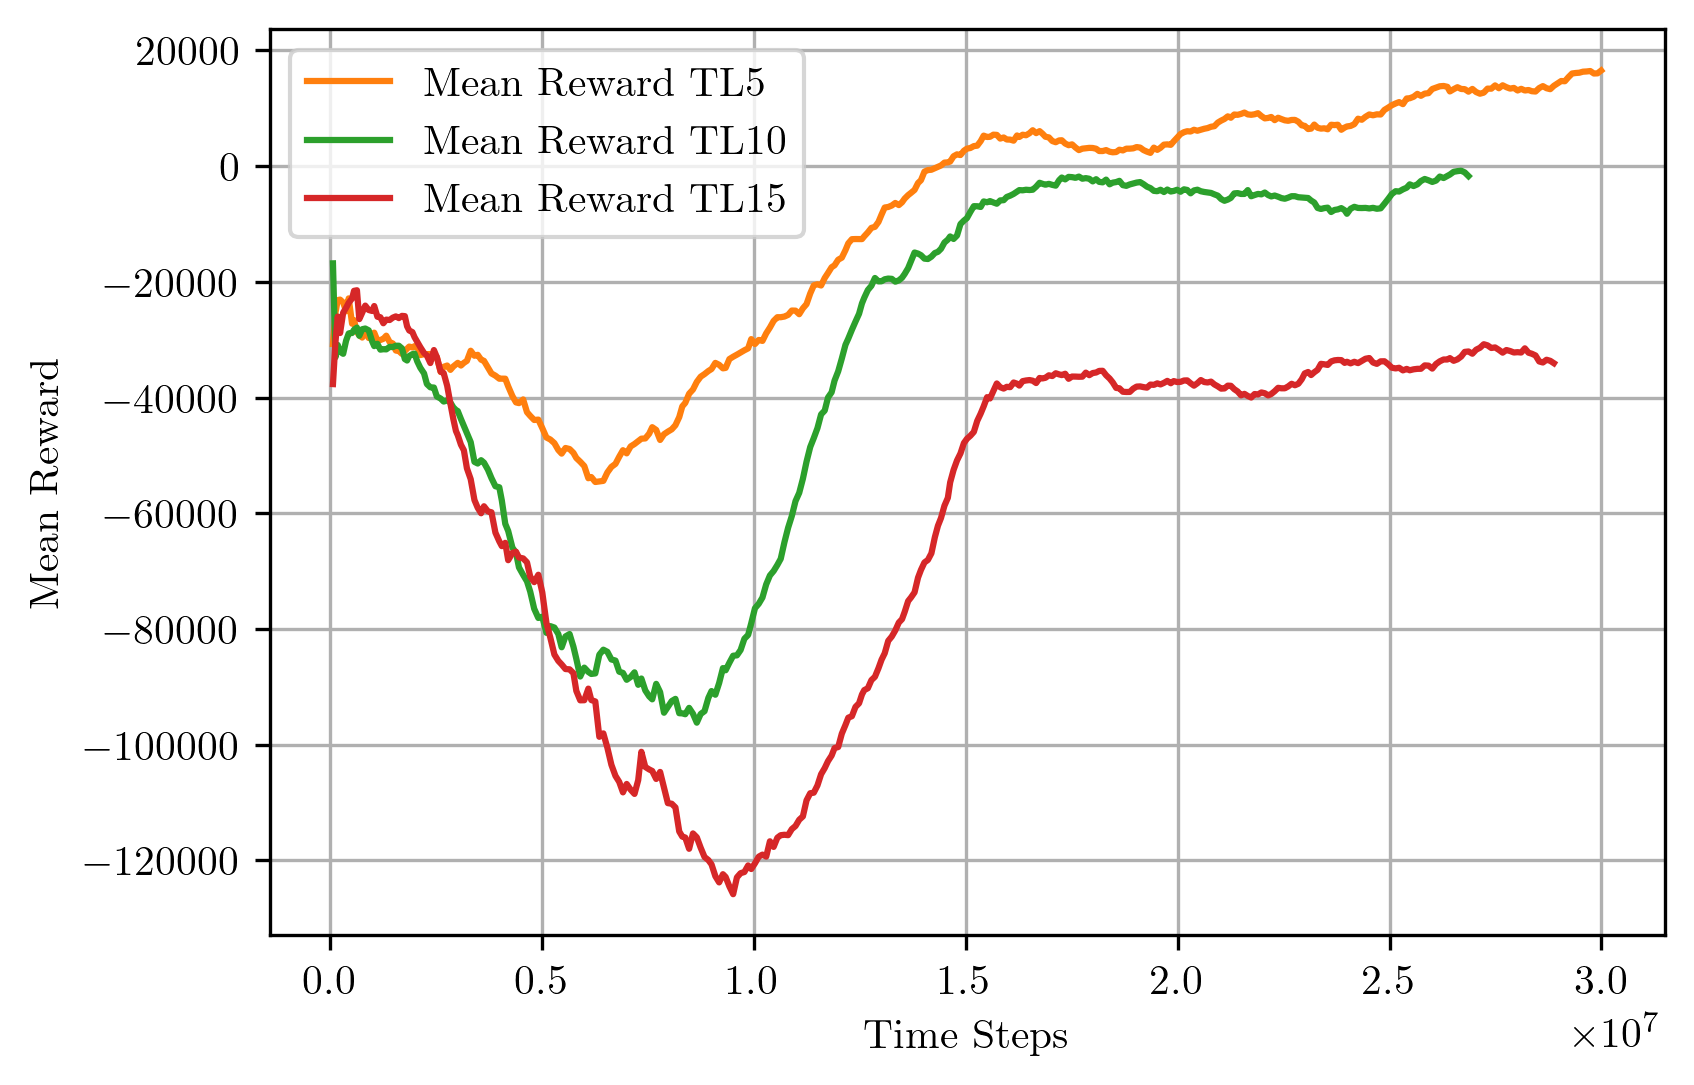

In [89]:
# plotting mean reward against step
fig, ax = plt.subplots(dpi=300)


df_training.plot(
    x=('TF_5', 'Step'),
    y=[('TF_5', 'mean reward'), ('TF_10', 'mean reward'), ('TF_15', 'mean reward')],
    ax = ax,
    grid=True,
    color=['C1', 'C2', 'C3']
)

ax.legend(['Mean Reward TL5', 'Mean Reward TL10', 'Mean Reward TL15'])
ax.set_xlabel('Time Steps')
ax.set_ylabel('Mean Reward')

# plt.show(
plt.savefig('./figures/mean reward.pgf', format='pgf')

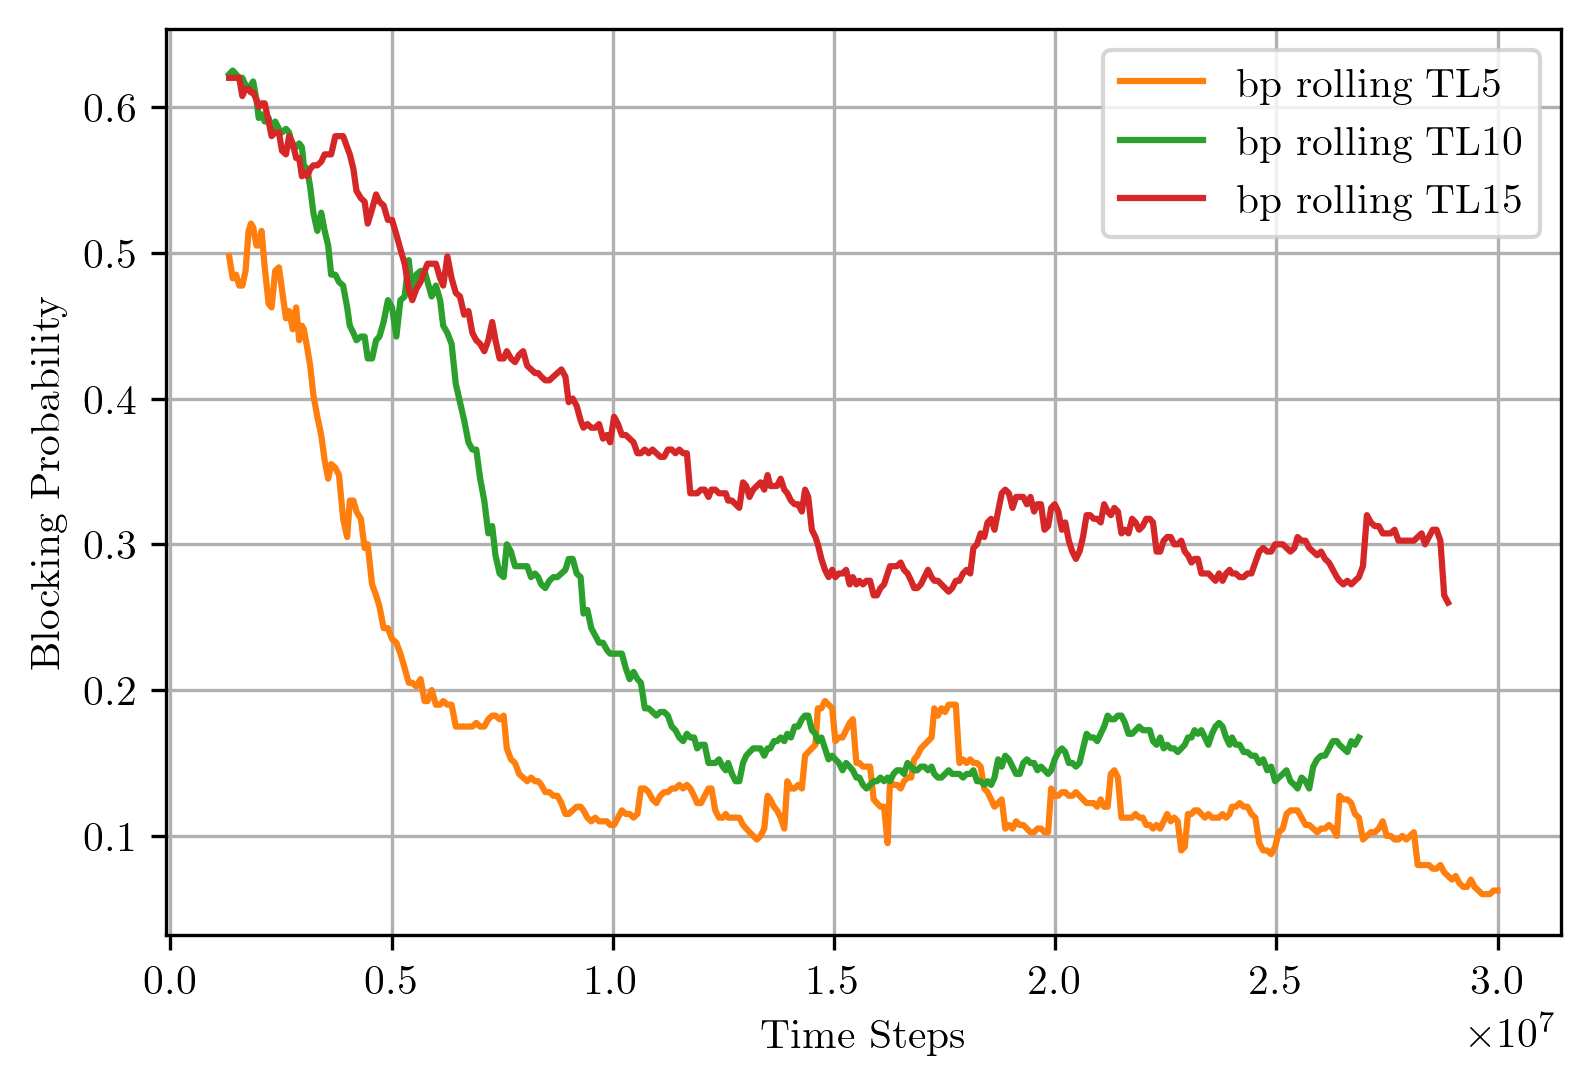

In [90]:
# plotting bp rolling against step
fig, ax = plt.subplots(dpi=300)


df_training.plot(
    x=('TF_5', 'Step'),
    y=[('TF_5', 'bp rolling'), ('TF_10', 'bp rolling'), ('TF_15', 'bp rolling')],
    ax = ax,
    grid=True,
    color=['C1', 'C2', 'C3']
)

ax.legend(['bp rolling TL5', 'bp rolling TL10', 'bp rolling TL15'])
ax.set_xlabel('Time Steps')
ax.set_ylabel('Blocking Probability')

# plt.show(
plt.savefig('./figures/bp rolling.pgf', format='pgf')

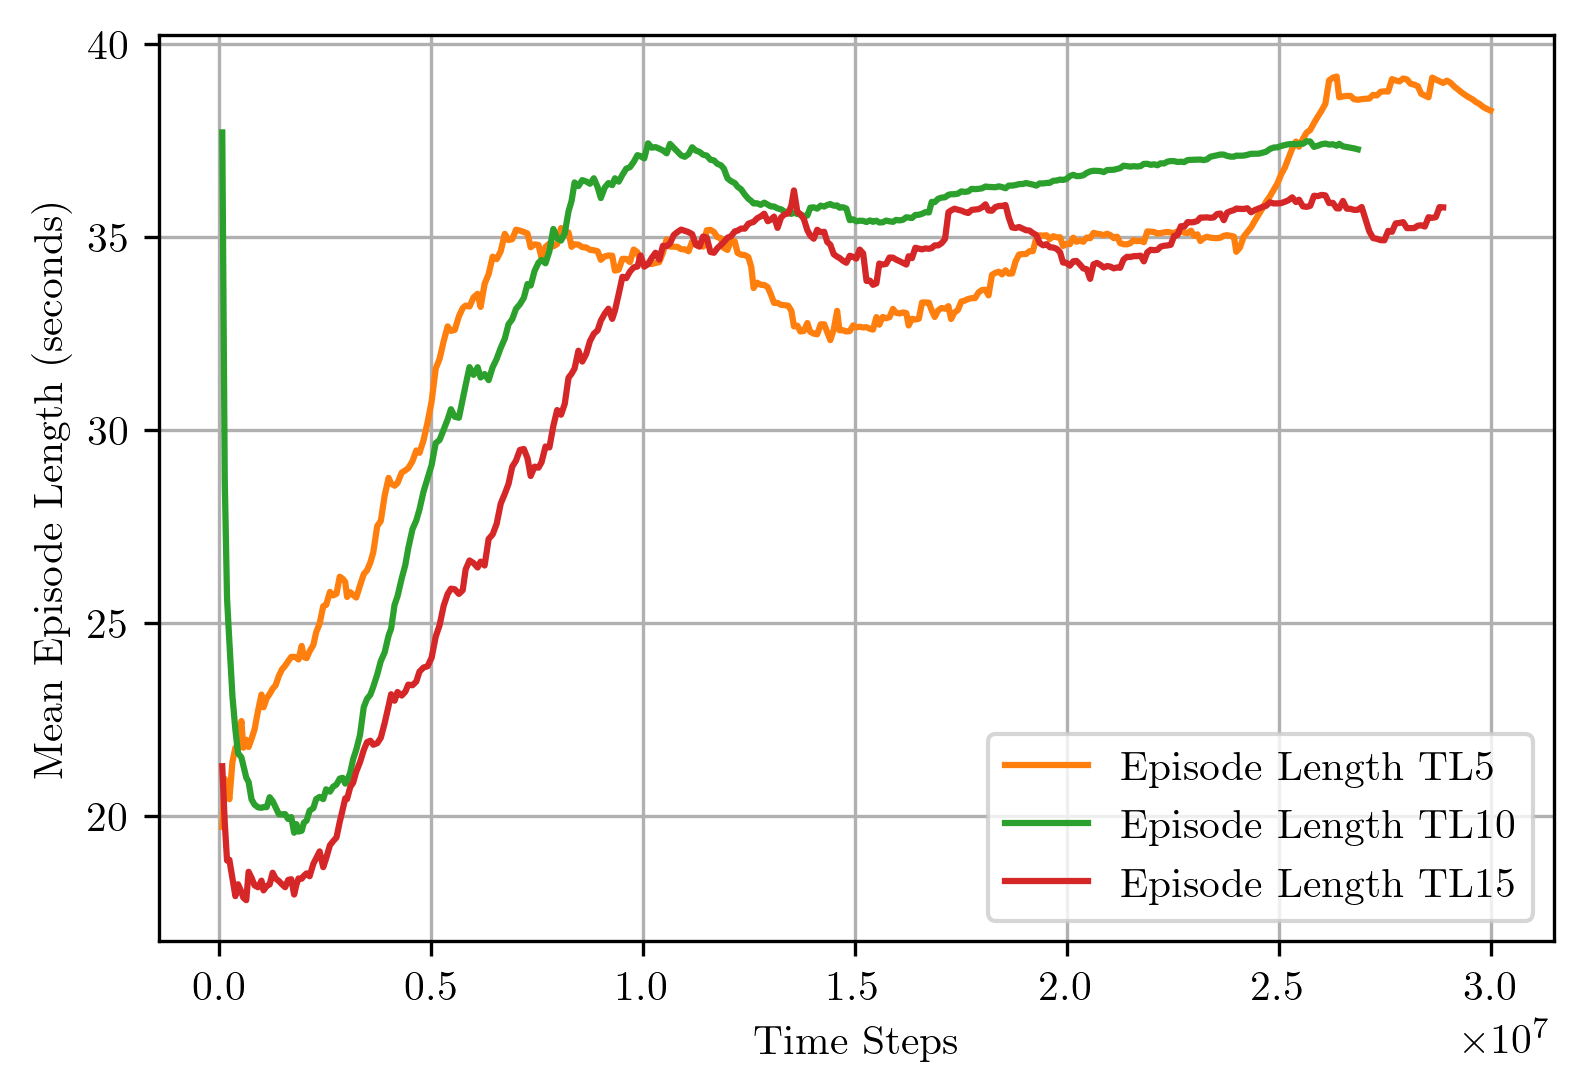

In [91]:
# plotting episode time against step
fig, ax = plt.subplots(dpi=300)


df_training.plot(
    x=('TF_5', 'Step'),
    y=[('TF_5', 'episode time'), ('TF_10', 'episode time'), ('TF_15', 'episode time')],
    ax = ax,
    grid=True,
    color=['C1', 'C2', 'C3']
)

ax.legend(['Episode Length TL5', 'Episode Length TL10', 'Episode Length TL15'])
ax.set_xlabel('Time Steps')
ax.set_ylabel('Mean Episode Length (seconds)')

# plt.show(
plt.savefig('./figures/episode time.pgf', format='pgf')

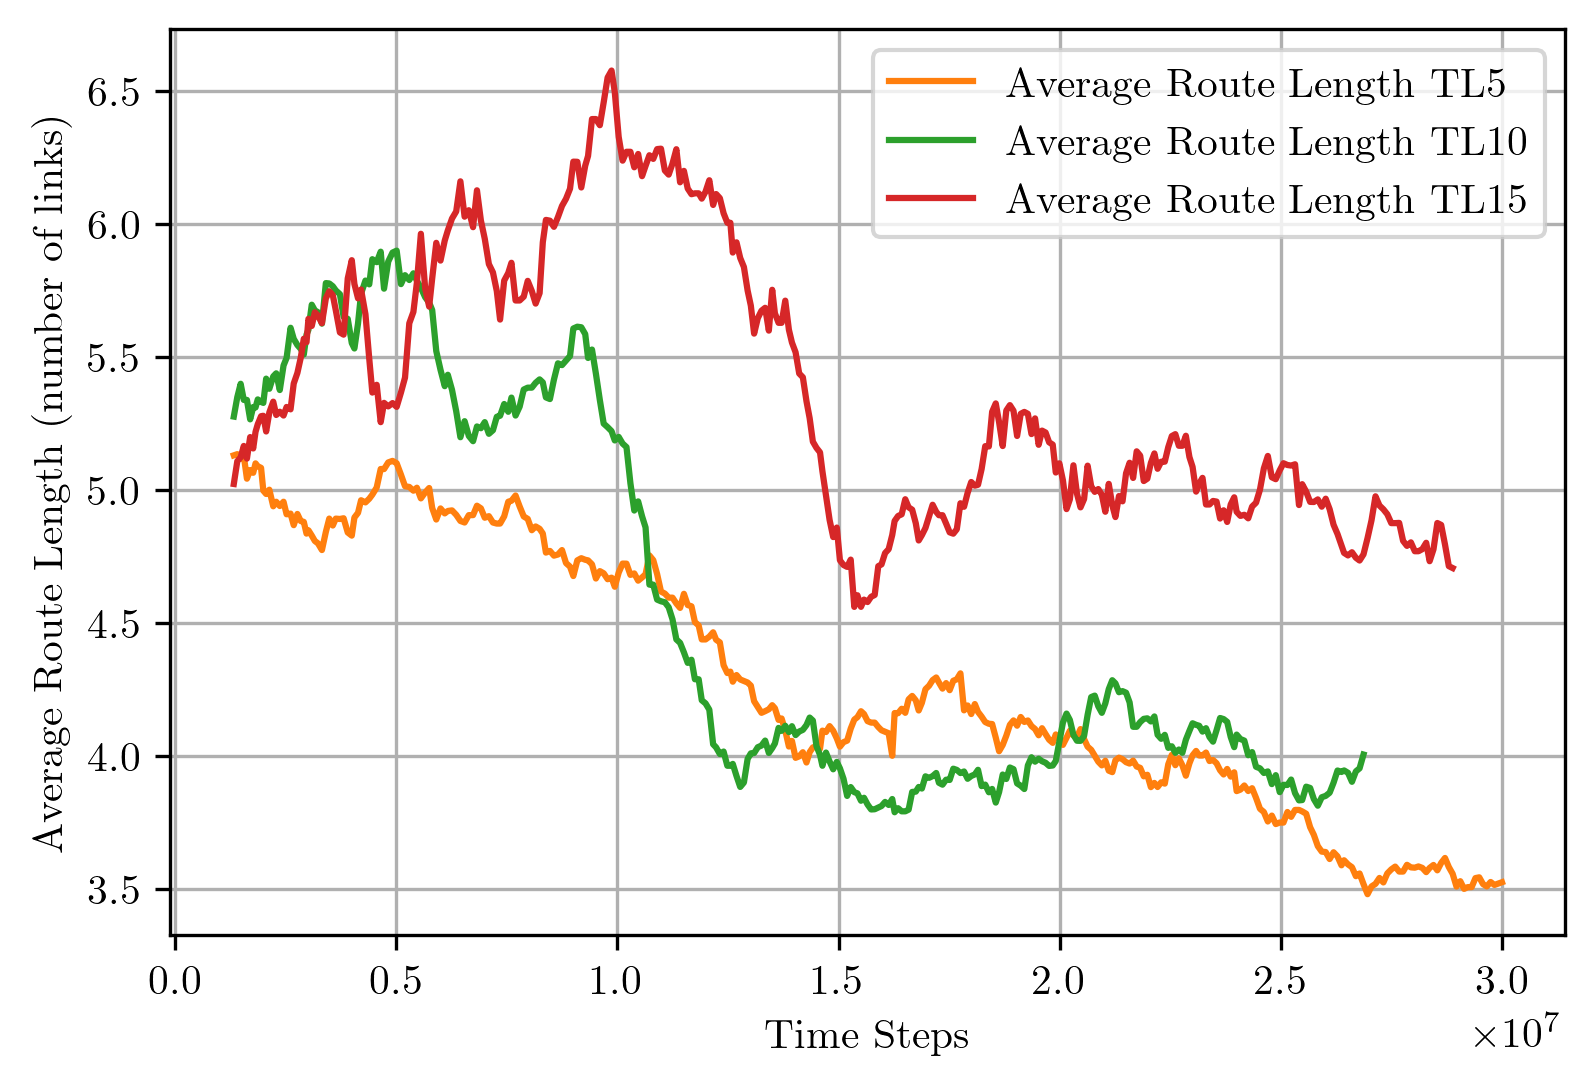

In [92]:
# plotting avg route length rolling against step
fig, ax = plt.subplots(dpi=300)


df_training.plot(
    x=('TF_5', 'Step'),
    y=[('TF_5', 'avg route length rolling'), ('TF_10', 'avg route length rolling'), ('TF_15', 'avg route length rolling')],
    ax = ax,
    grid=True,
    color=['C1', 'C2', 'C3']
)

ax.legend(['Average Route Length TL5', 'Average Route Length TL10', 'Average Route Length TL15'])
ax.set_xlabel('Time Steps')
ax.set_ylabel('Average Route Length (number of links)')

# plt.show(
plt.savefig('./figures/avg route length rolling.pgf', format='pgf')

In [141]:
random_df = pd.read_csv('./results/LATEST_seed_test_results_TL_10.csv', index_col=0)

In [142]:
from ast import literal_eval
literal_eval(random_df.iloc[0,0])

{'bp': 0.25,
 'avg_length': 4.266666666666667,
 'blocked_continuous': 0.0,
 'blocked_contiguous': 0.3333333333333333,
 'traffic_load': 5.0,
 'seed_no': 0}

In [143]:
random_df = random_df.applymap(literal_eval)

In [144]:
random_df.iloc[0,0]

{'bp': 0.25,
 'avg_length': 4.266666666666667,
 'blocked_continuous': 0.0,
 'blocked_contiguous': 0.3333333333333333,
 'traffic_load': 5.0,
 'seed_no': 0}

In [145]:
df_bp = pd.DataFrame(columns=['bp', 'avg_length', 'blocked_continuous', 'blocked_contiguous', 'traffic_load', 'blocked_no_reason', 'normalised contiguous', 'normalised continuous'])
for i in range(len(random_df.columns)):
    mean_bp = random_df.apply(lambda x: x[i]['bp'], axis=1).mean()
    mean_avg_length = random_df.apply(lambda x: x[i]['avg_length'], axis=1).mean()
    mean_blocked_continuous = random_df.apply(lambda x: x[i]['blocked_continuous'], axis=1).mean()
    mean_blocked_contiguous = random_df.apply(lambda x: x[i]['blocked_contiguous'], axis=1).mean()
    no_reason =  random_df.apply(lambda x: 1-(x[i]['blocked_contiguous'] + x[i]['blocked_continuous']), axis=1).mean()
    mean_contiguous_normalised = random_df.apply(lambda x: x[i]['blocked_contiguous']/(x[i]['blocked_contiguous'] + x[i]['blocked_continuous']+0.001), axis=1).mean()
    mean_continuous_normalised = random_df.apply(lambda x: x[i]['blocked_continuous']/(x[i]['blocked_contiguous'] + x[i]['blocked_continuous']+0.001), axis=1).mean()
    traffic_load = random_df.apply(lambda x: x[i]['traffic_load'], axis=1).mean()
    # no_reason = 1-(mean_blocked_contiguous + mean_blocked_continuous)
    df_bp = df_bp.append({
        'bp': mean_bp,
        'avg_length': mean_avg_length,
        'blocked_continuous': mean_blocked_continuous,
        'blocked_contiguous': mean_blocked_contiguous,
        'traffic_load': traffic_load,
        'blocked_no_reason': no_reason,
        'normalised contiguous': mean_contiguous_normalised,
        'normalised continuous': mean_continuous_normalised,
    }, ignore_index=True)

C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2852296054.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bp = df_bp.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2852296054.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bp = df_bp.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2852296054.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bp = df_bp.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2852296054.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bp = df_bp.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2852296054.py:12: FutureWarning: The frame.append m

In [123]:
# df_bp['no_reason'] = 1 - (df_bp['blocked_continuous'] + df_bp['blocked_contiguous'])
# df_bp['contiguous_normalised'] = df_bp['blocked_contiguous'].divide(1-df_bp['no_reason'])
# df_bp['continuous_normalised'] = df_bp['blocked_continuous'].divide(1-df_bp['no_reason'])

In [125]:
df_bp

,bp,avg_length,blocked_continuous,blocked_contiguous,traffic_load,blocked_no_reason,normalised contiguous,normalised continuous
0,0.33871,3.920334,0.0,0.405914,5.0,0.594086,0.516129,0.0
1,0.351613,4.036659,0.0,0.400538,5.5,0.599462,0.580645,0.0
2,0.324194,4.015311,0.0,0.48172,6.0,0.51828,0.645161,0.0
3,0.356452,4.11057,0.0,0.456989,6.5,0.543011,0.677419,0.0
4,0.356452,4.089449,0.0,0.471505,7.0,0.528495,0.677419,0.0
5,0.409677,4.316078,0.0,0.40722,7.5,0.59278,0.677419,0.0
6,0.396774,4.32223,0.0,0.450768,8.0,0.549232,0.677419,0.0
7,0.437097,4.45973,0.0,0.442166,8.5,0.557834,0.709677,0.0
8,0.422581,4.441712,0.0,0.451843,9.0,0.548157,0.677419,0.0
9,0.425806,4.541537,0.0,0.413556,9.5,0.586444,0.677419,0.0


C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


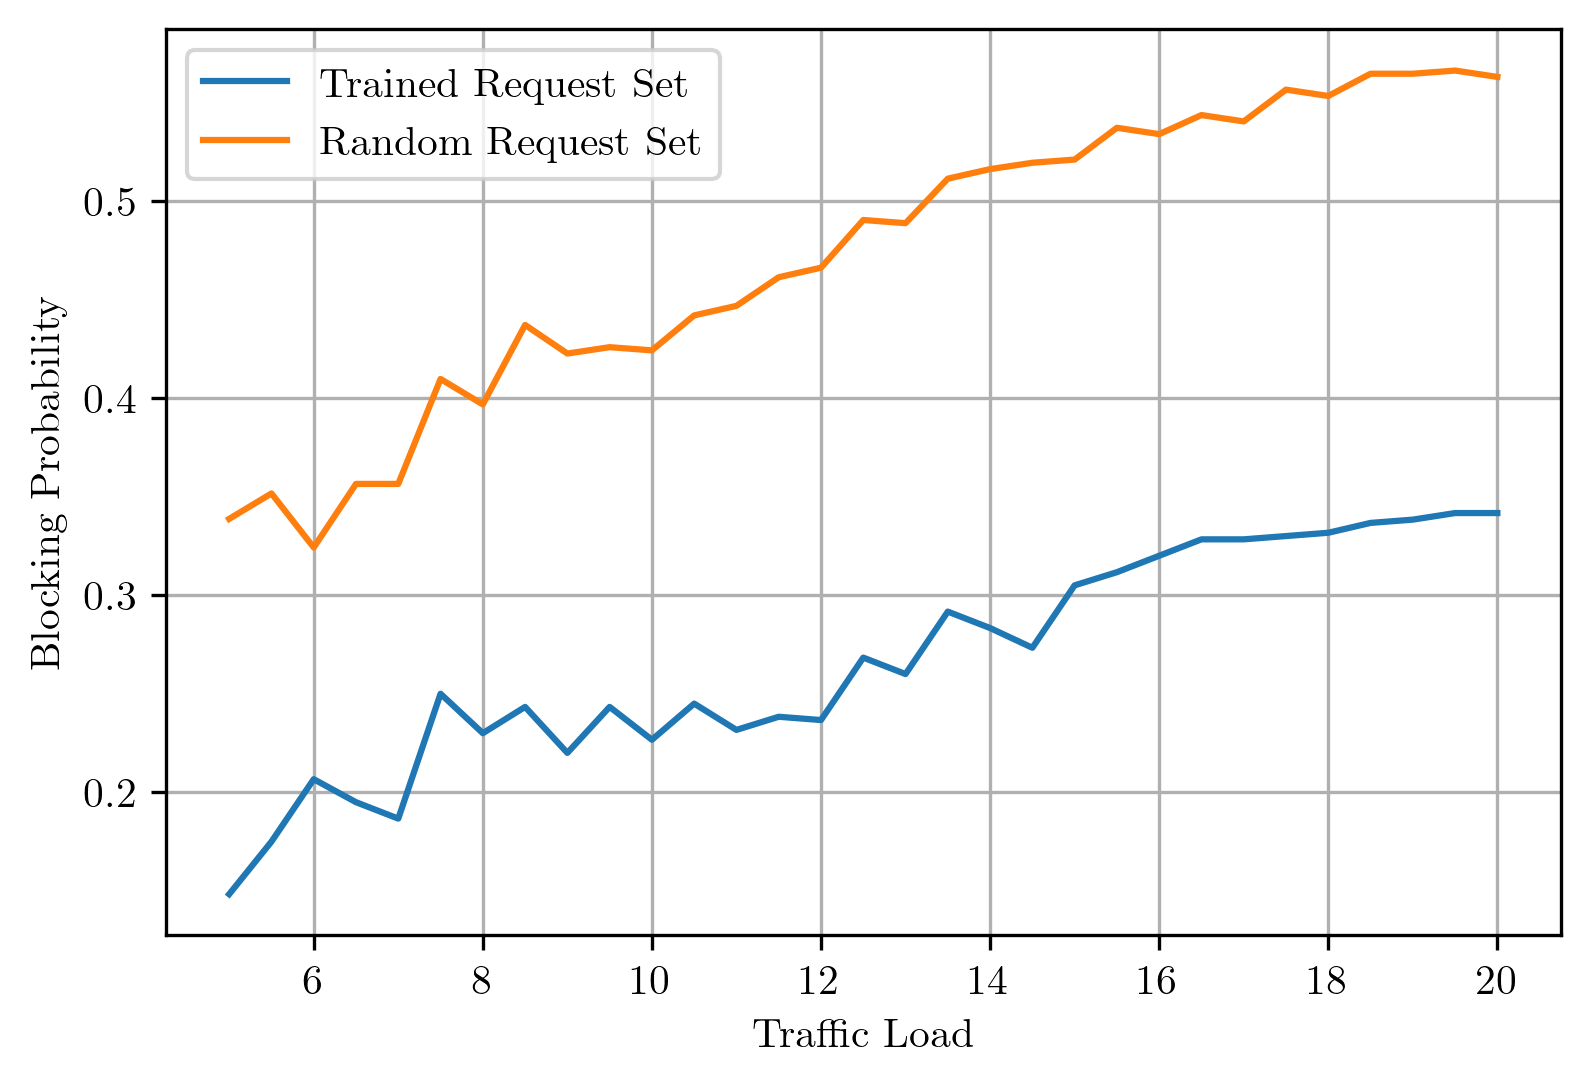

In [101]:
# blocking probability vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'bp')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='bp',
    ax = ax,
    grid=True
)

ax.legend(['Trained Request Set', 'Random Request Set'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/bp_vs_traffic_load_comparison.pgf', format='pgf')

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


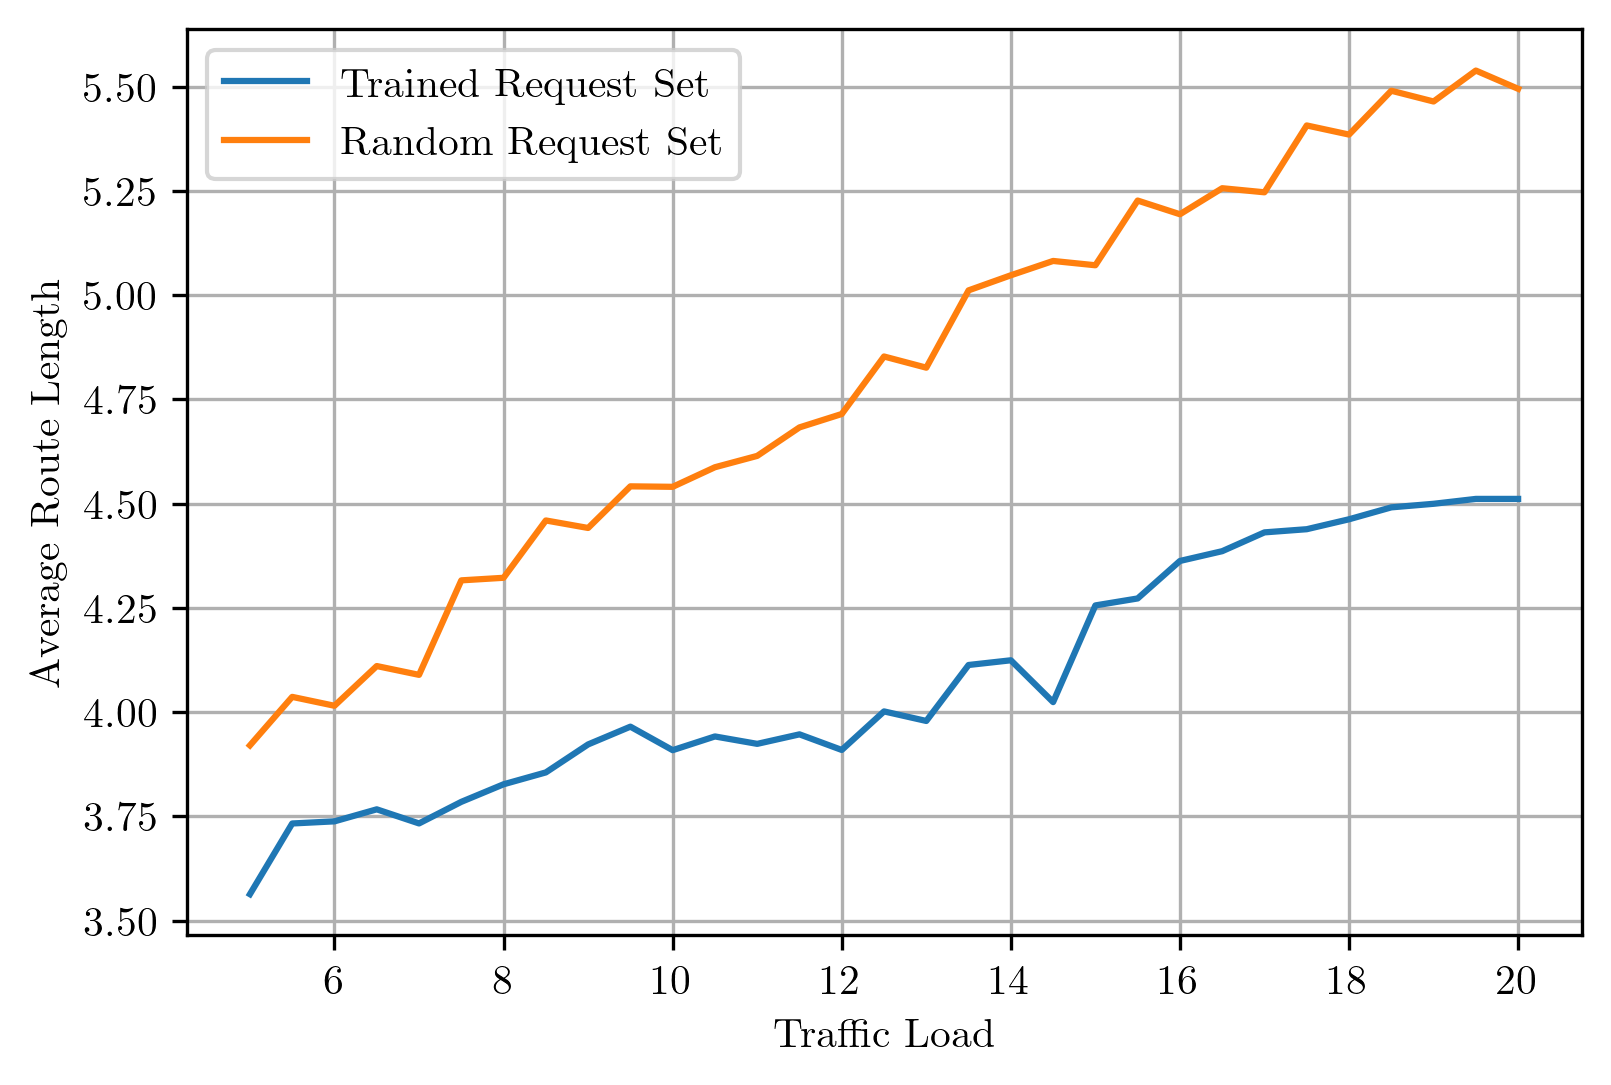

In [104]:
# avg_route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'avg_length')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='avg_length',
    ax = ax,
    grid=True
)

ax.legend(['Trained Request Set', 'Random Request Set'])
ax.set_ylabel('Average Route Length')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/route_length_vs_traffic_load_comparison.pgf', format='pgf')

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


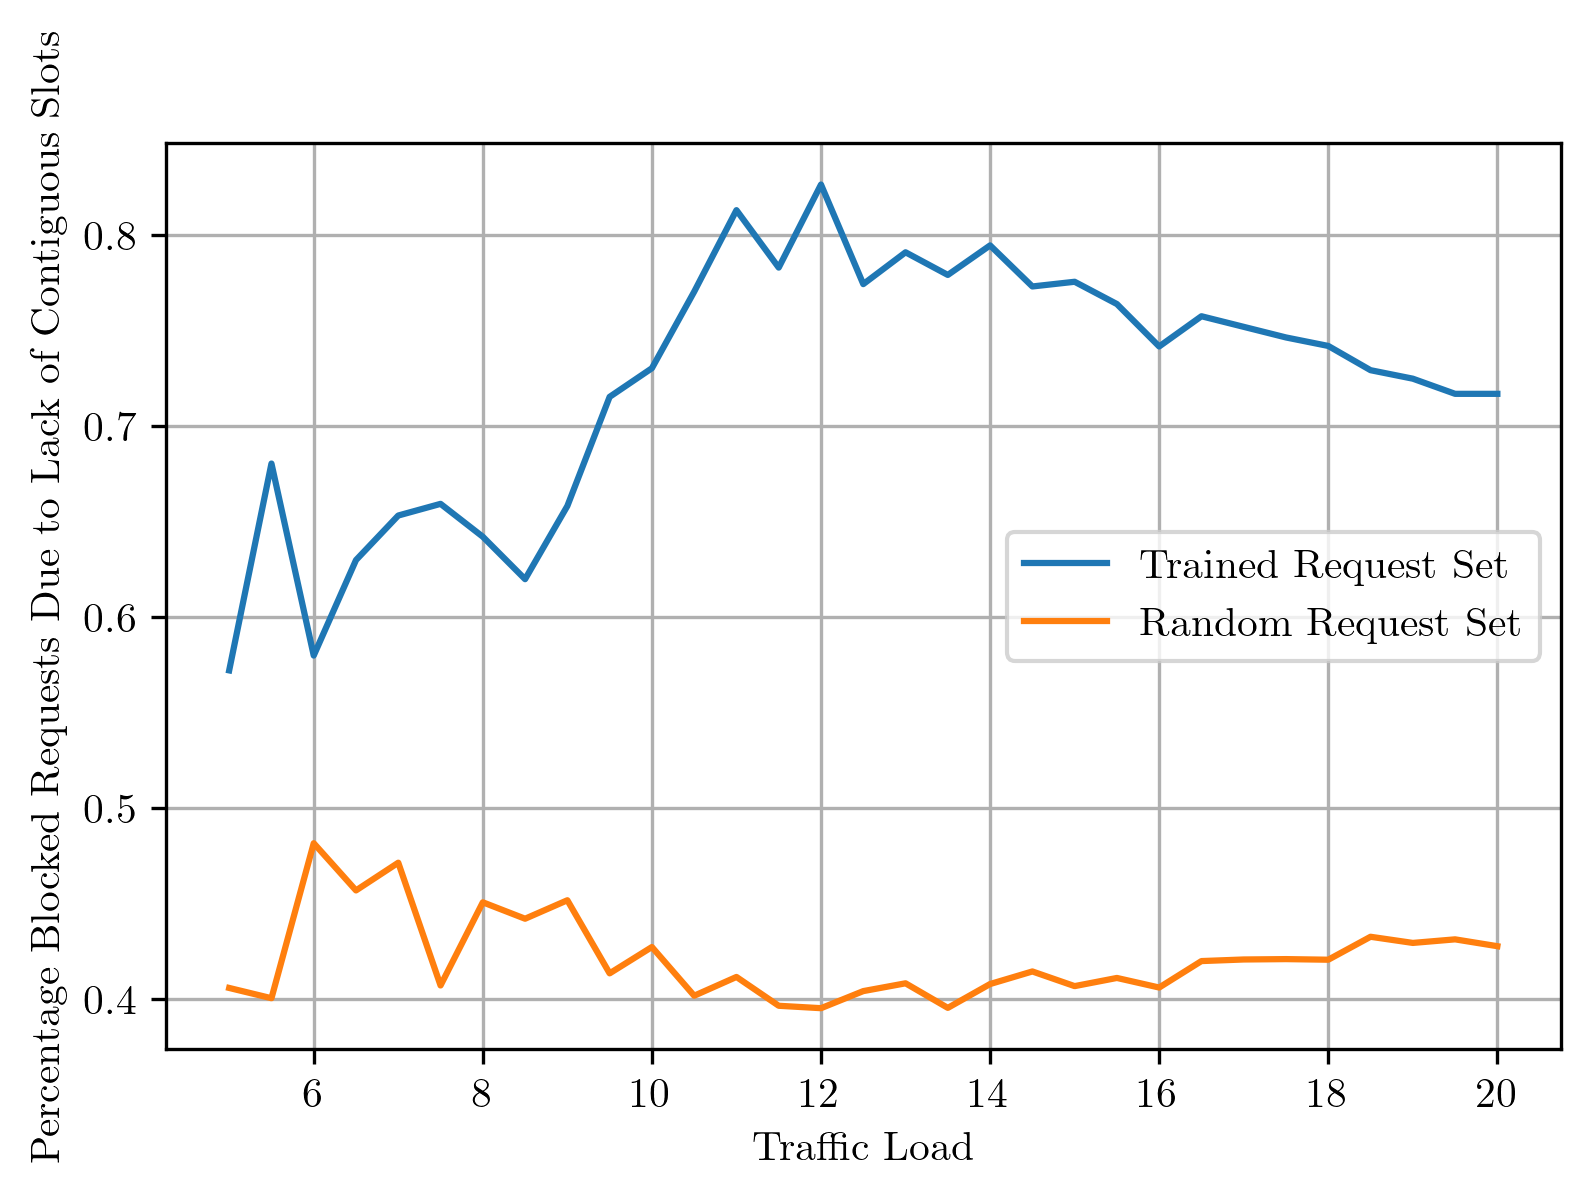

In [106]:
# blocking probability contiguous vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'blocked_contiguous')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='blocked_contiguous',
    ax = ax,
    grid=True
)

ax.legend(['Trained Request Set', 'Random Request Set'])
ax.set_ylabel('Percentage Blocked Requests Due to Lack of Contiguous Slots')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/contiguous_vs_traffic_load_comparison.pgf', format='pgf')

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


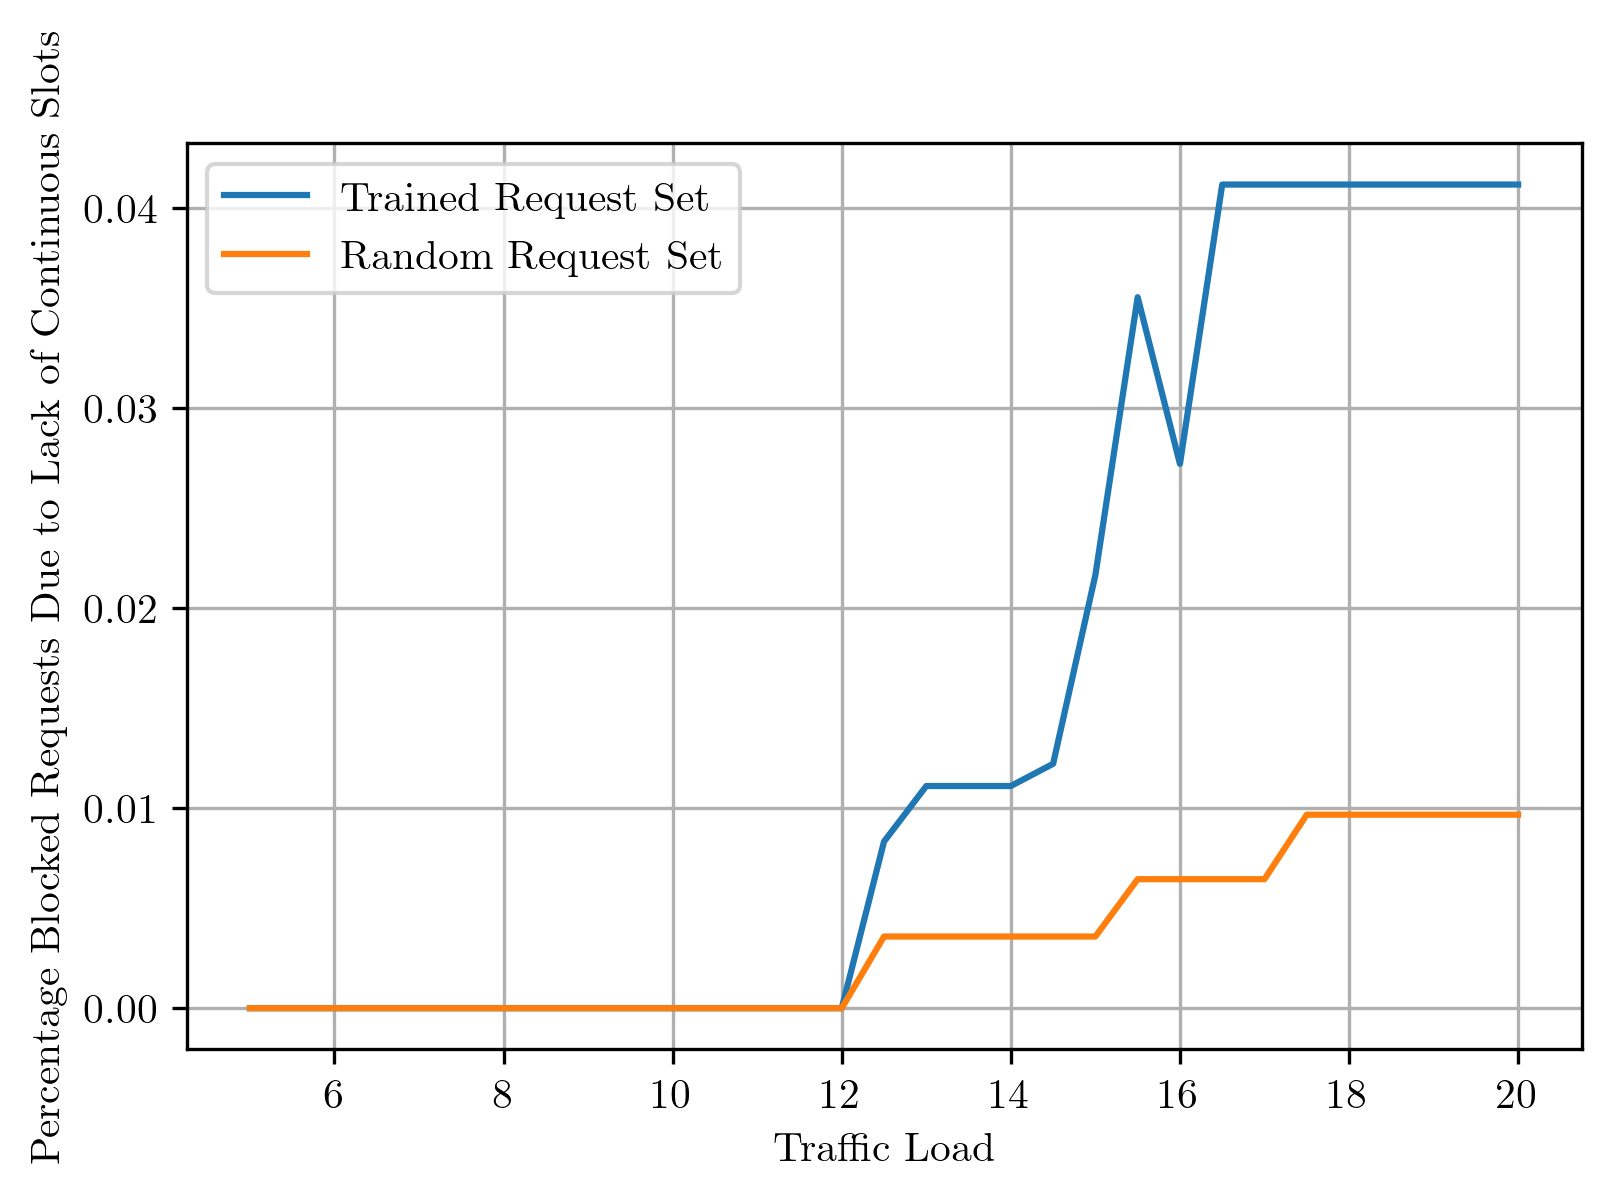

In [107]:
# blocking probability continuous vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'blocked_continuous')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='blocked_continuous',
    ax = ax,
    grid=True
)

ax.legend(['Trained Request Set', 'Random Request Set'])
ax.set_ylabel('Percentage Blocked Requests Due to Lack of Continuous Slots')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/continuous_vs_traffic_load_comparison.pgf', format='pgf')

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


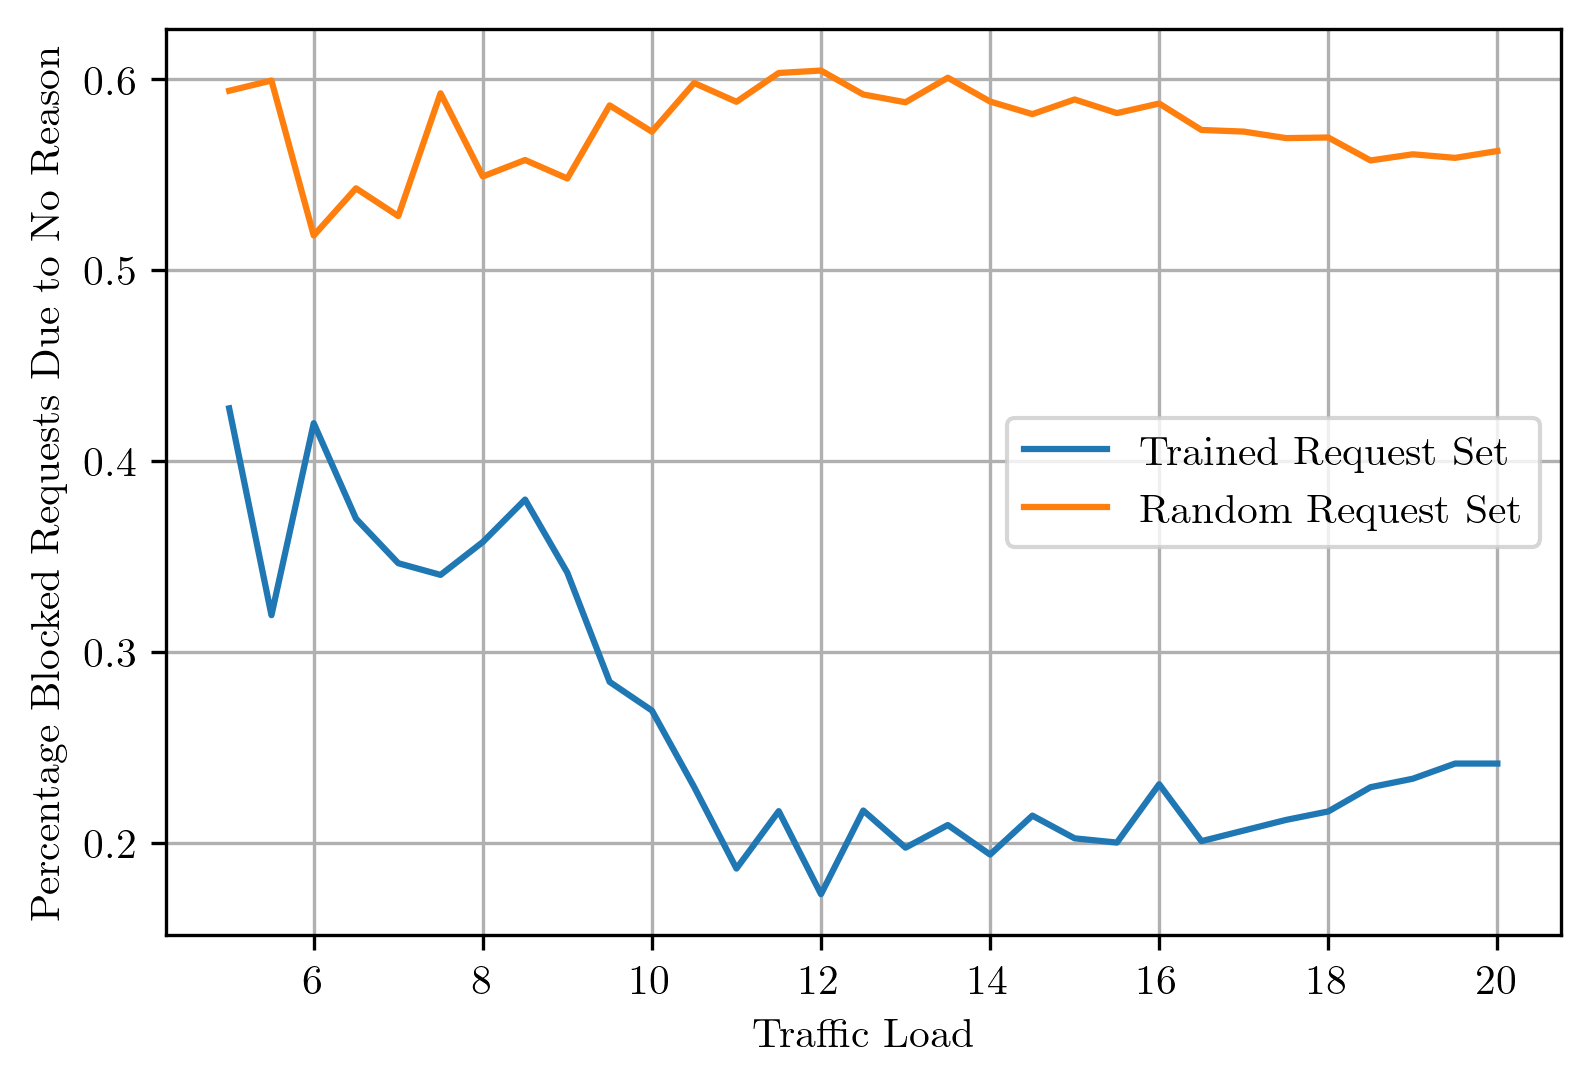

In [112]:
# blocking probability no reason vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'no_reason')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='blocked_no_reason',
    ax = ax,
    grid=True
)

ax.legend(['Trained Request Set', 'Random Request Set'])
ax.set_ylabel('Percentage Blocked Requests Due to No Reason')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/no_reason_vs_traffic_load_comparison.pgf', format='pgf')

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


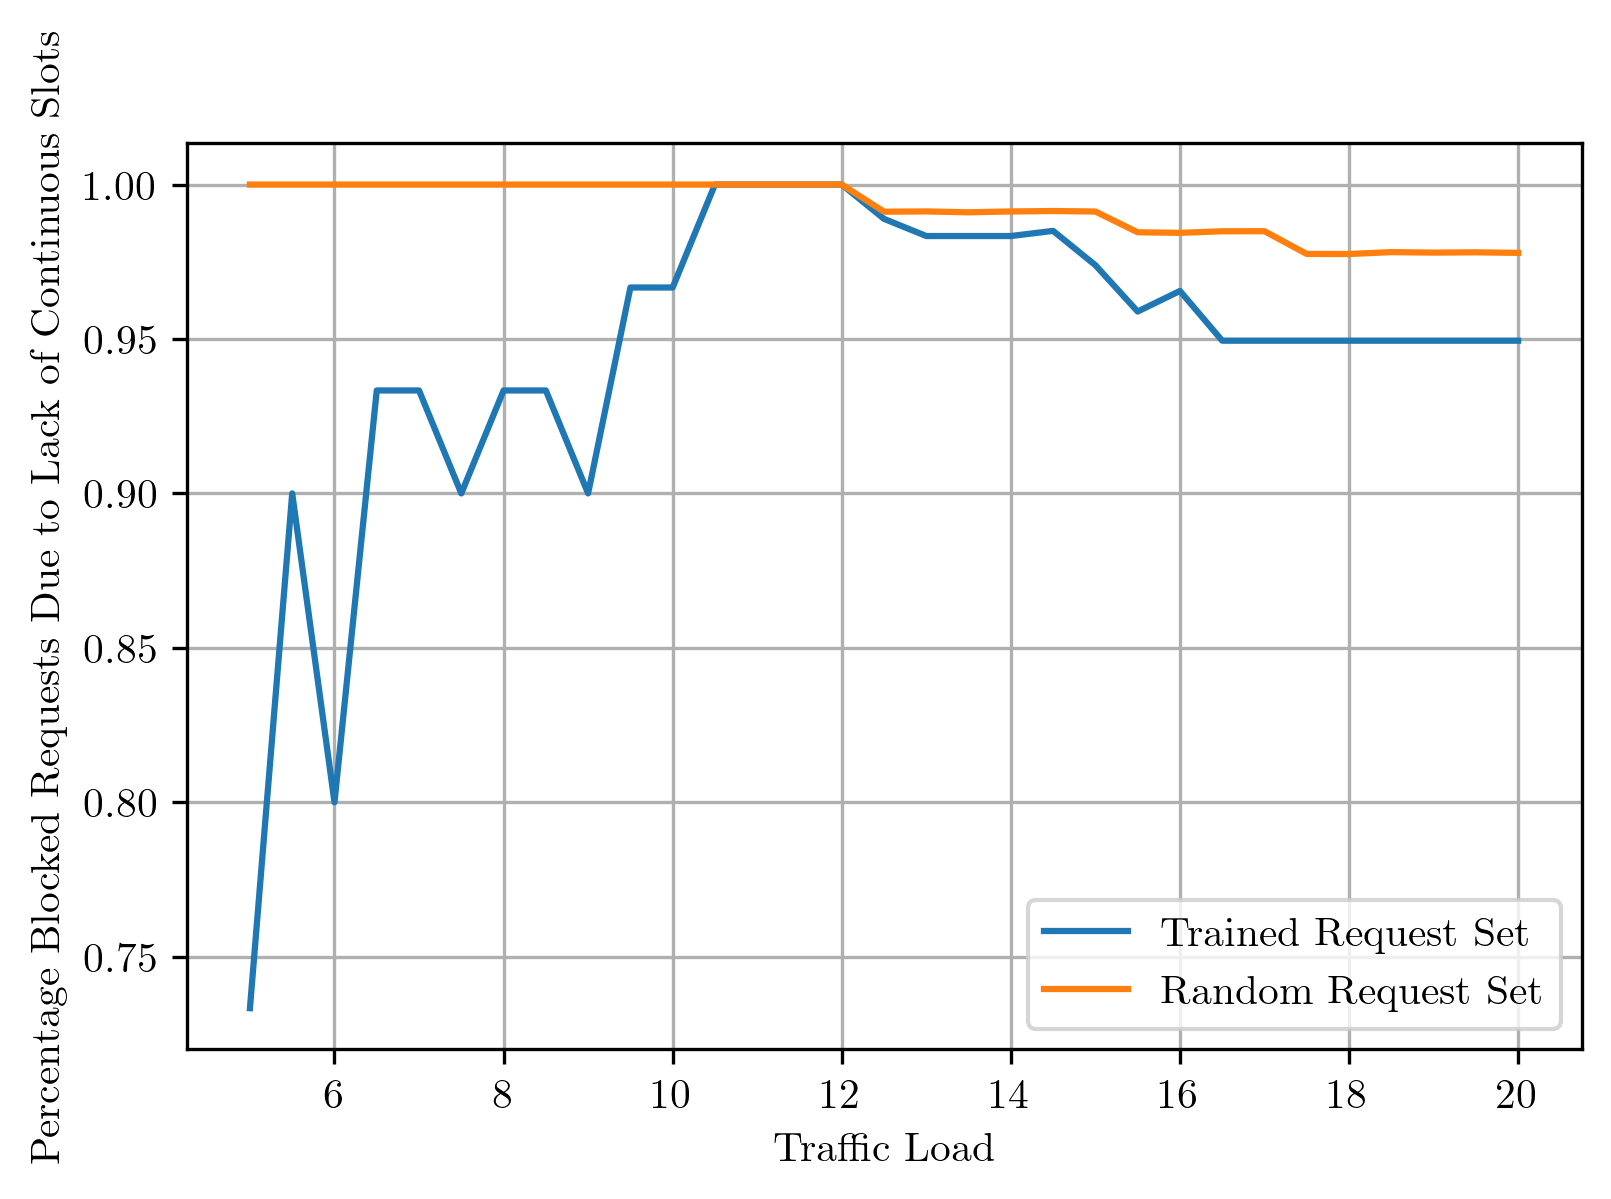

In [118]:
# avg_route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'contiguous_normalised')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='contiguous_normalised',
    ax = ax,
    grid=True
)

ax.legend(['Trained Request Set', 'Random Request Set'])
ax.set_ylabel('Percentage Blocked Requests Due to Lack of Contiguous Slots')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/noramlised contiguous_vs_traffic_load_comparison.pgf', format='pgf')

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


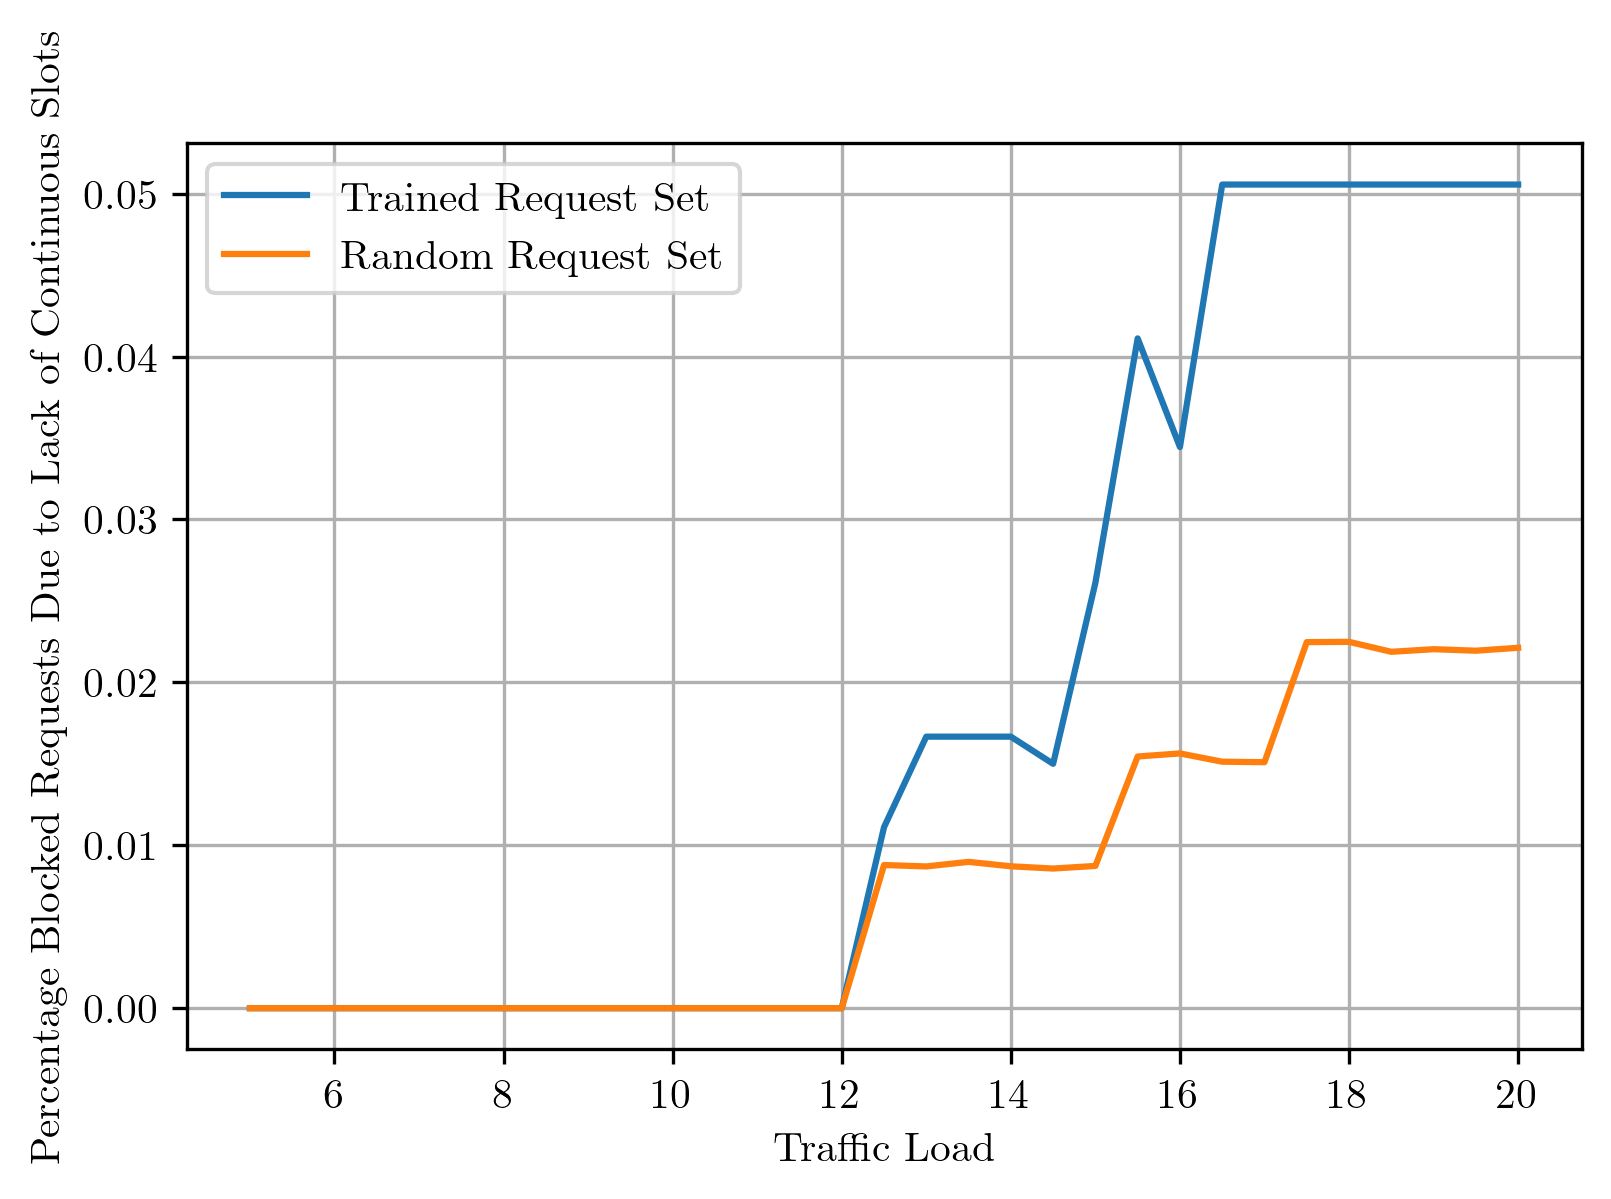

In [119]:
# avg_route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'continuous_normalised')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='continuous_normalised',
    ax = ax,
    grid=True
)

ax.legend(['Trained Request Set', 'Random Request Set'])
ax.set_ylabel('Percentage Blocked Requests Due to Lack of Continuous Slots')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/noramlised continuous_vs_traffic_load_comparison.pgf', format='pgf')

In [151]:
df_2_3.iloc[0,0]

"{'bp': 0.55, 'avg_length': 5.777777777777778, 'blocked_continuous': 0.0, 'blocked_contiguous': 1.0, 'traffic_load': 5.0, 'seed_no': 0}"

In [152]:
# 2-3 requests traffic load graphs

df_2_3 = pd.read_csv('results/2_3_BW_REQ_Rand_Seed_results_TL_10.csv', index_col=0)
df_2_3 = df_2_3.applymap(literal_eval)
df = pd.DataFrame(columns=['bp', 'avg_length', 'blocked_continuous', 'blocked_contiguous', 'traffic_load', 'blocked_no_reason', 'normalised contiguous', 'normalised continuous'])
for i in range(len(df_2_3.columns)):
    mean_bp = df_2_3.apply(lambda x: x[i]['bp'], axis=1).mean()
    mean_avg_length = df_2_3.apply(lambda x: x[i]['avg_length'], axis=1).mean()
    mean_blocked_continuous = df_2_3.apply(lambda x: x[i]['blocked_continuous'], axis=1).mean()
    mean_blocked_contiguous = df_2_3.apply(lambda x: x[i]['blocked_contiguous'], axis=1).mean()
    no_reason =  df_2_3.apply(lambda x: 1-(x[i]['blocked_contiguous'] + x[i]['blocked_continuous']), axis=1).mean()
    mean_contiguous_normalised = df_2_3.apply(lambda x: x[i]['blocked_contiguous']/(x[i]['blocked_contiguous'] + x[i]['blocked_continuous'] + 0.01), axis=1).mean()
    mean_continuous_normalised = df_2_3.apply(lambda x: x[i]['blocked_continuous']/(x[i]['blocked_contiguous'] + x[i]['blocked_continuous']+ 0.01) , axis=1).mean()
    traffic_load = df_2_3.apply(lambda x: x[i]['traffic_load'], axis=1).mean()
    # no_reason = 1-(mean_blocked_contiguous + mean_blocked_continuous)
    df = df.append({
        'bp': mean_bp,
        'avg_length': mean_avg_length,
        'blocked_continuous': mean_blocked_continuous,
        'blocked_contiguous': mean_blocked_contiguous,
        'traffic_load': traffic_load,
        'blocked_no_reason': no_reason,
        'normalised contiguous': mean_contiguous_normalised,
        'normalised continuous': mean_continuous_normalised,
    }, ignore_index=True)

C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2202240593.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2202240593.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2202240593.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2202240593.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\tkate\AppData\Local\Temp\ipykernel_6240\2202240593.py:16: FutureWarning: The frame.append method is deprecated and 

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


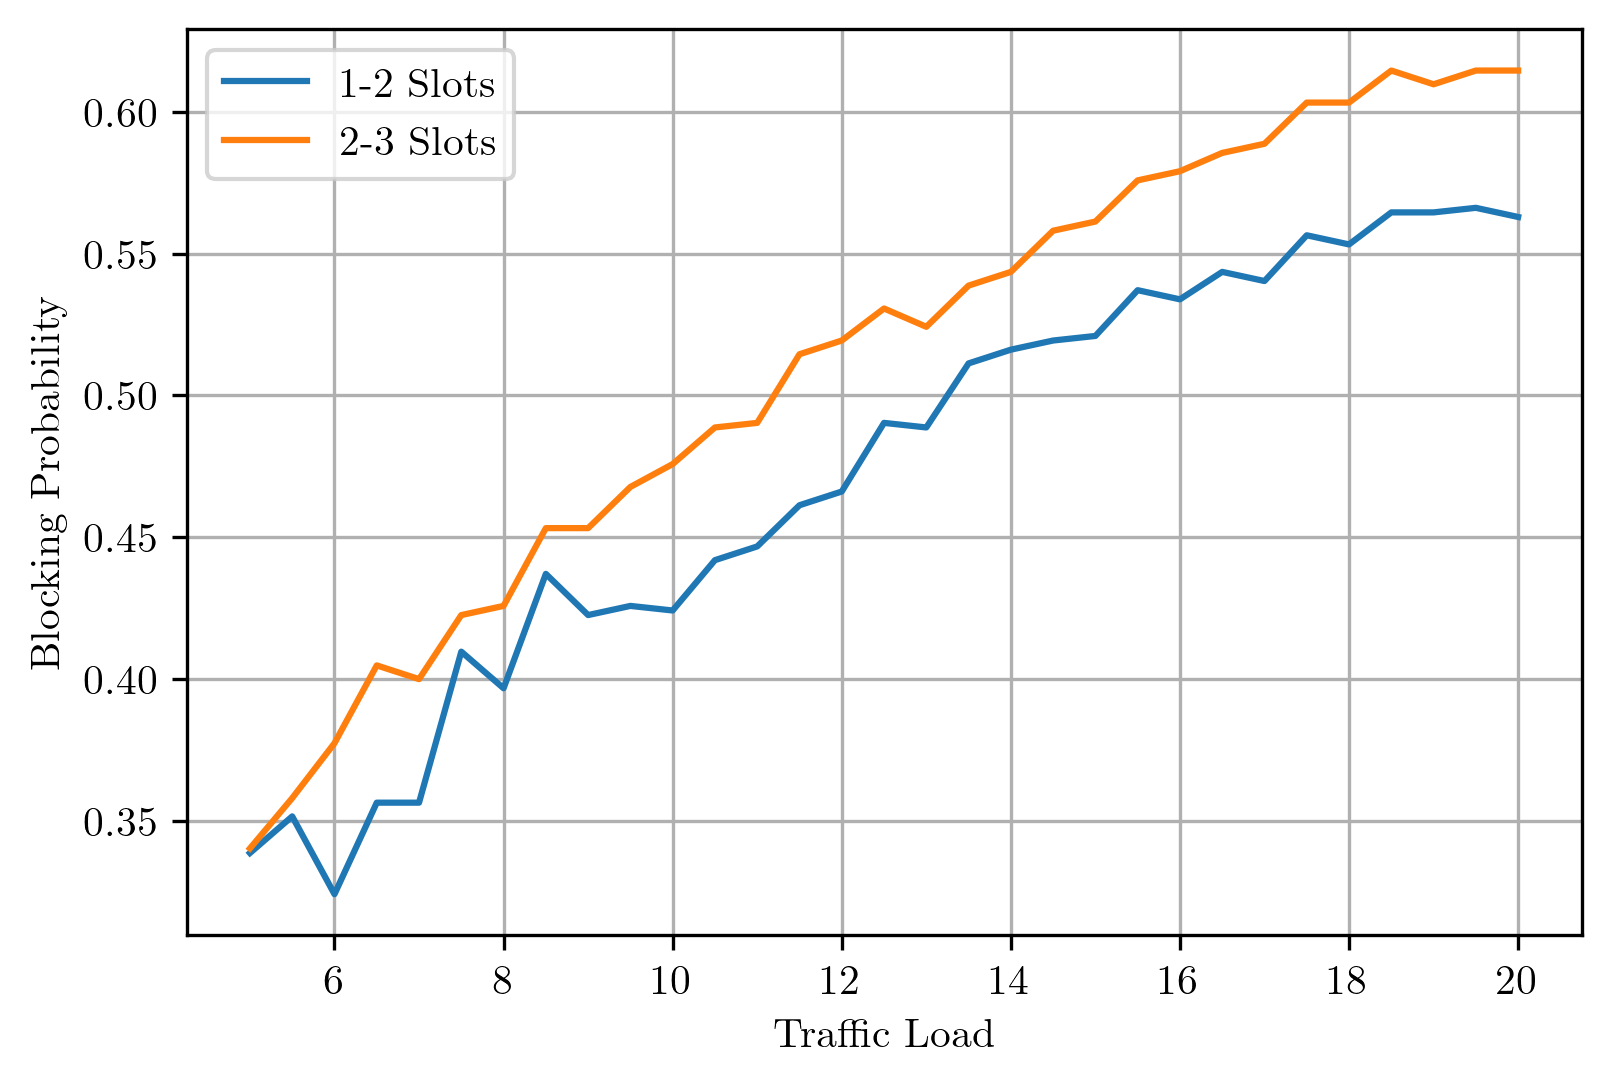

In [155]:
# avg_route length vs traffic load

fig, ax = plt.subplots(dpi=300)
# df_meaned.plot(
#     y=[('TF_10', 'continuous_normalised')],
#     ax = ax,
#     grid=True
# )

df_bp.plot(
    x='traffic_load',
    y='bp',
    ax = ax,
    grid=True
)

df.plot(
    x='traffic_load',
    y='bp',
    ax = ax,
    grid=True
)

ax.legend(['1-2 Slots', '2-3 Slots'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/bp_vs_traffic_load_comparison_2_3.pgf', format='pgf')

C:\Users\tkate\miniconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


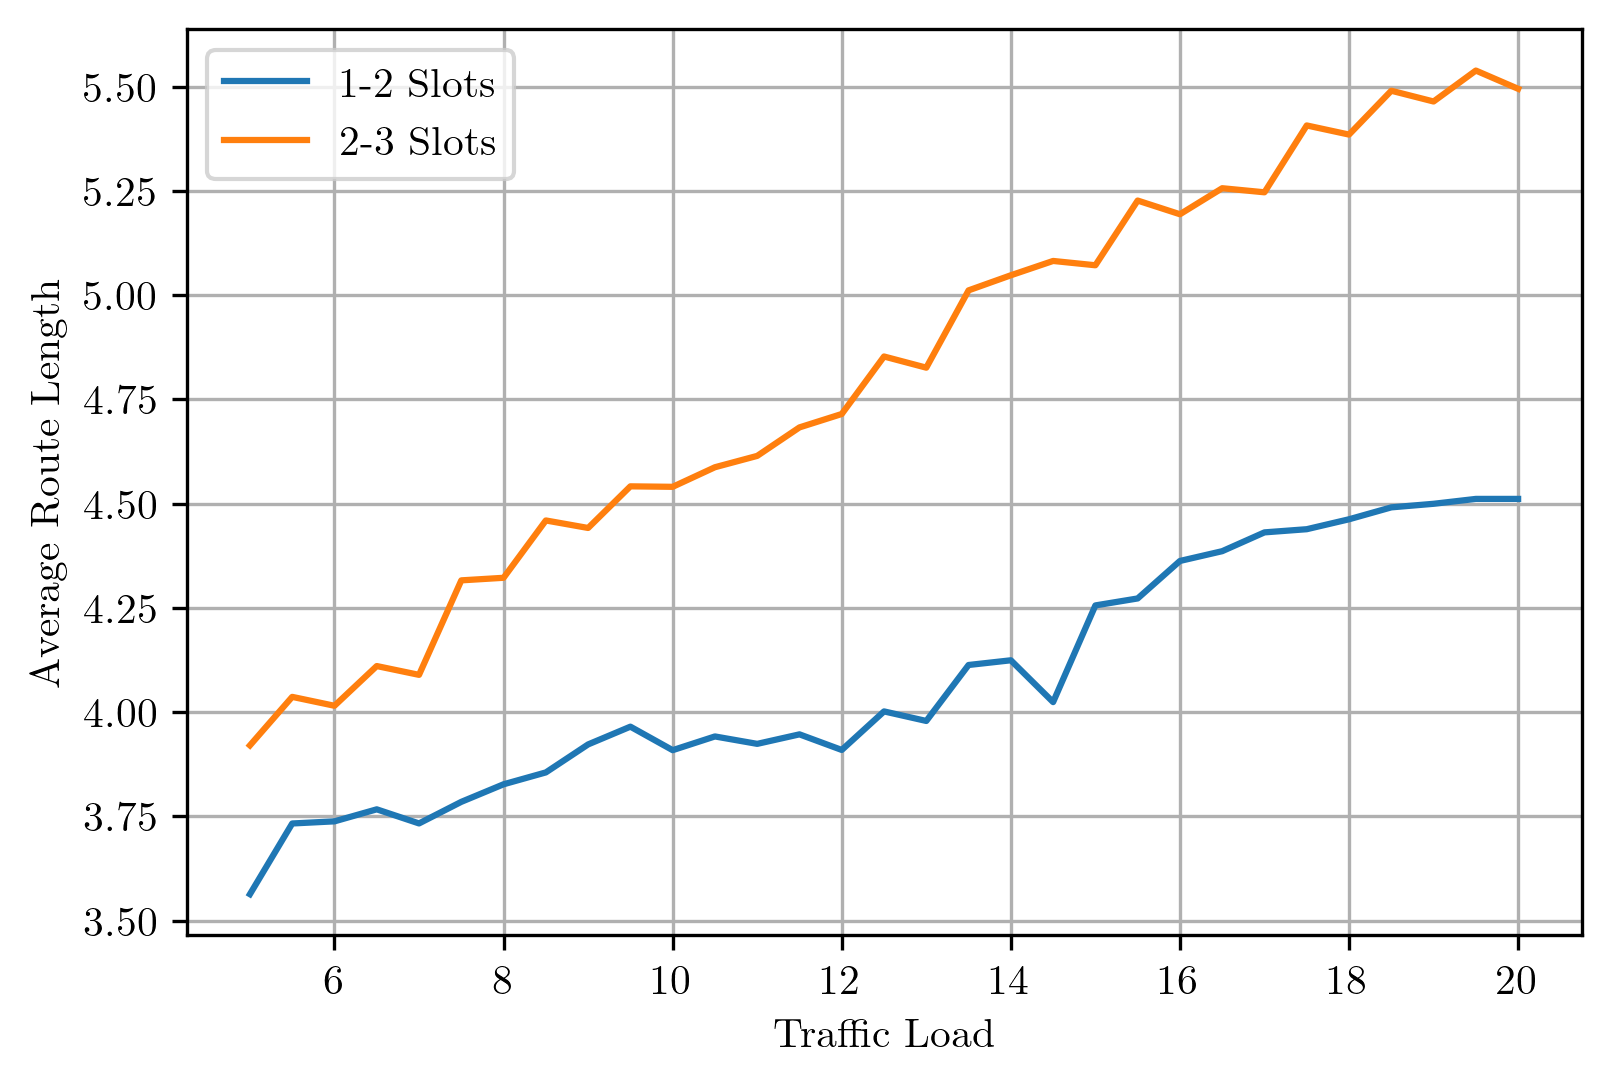

In [156]:
# avg_route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'avg_length')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='avg_length',
    ax = ax,
    grid=True
)

ax.legend(['1-2 Slots', '2-3 Slots'])
ax.set_ylabel('Average Route Length')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/route_length_vs_traffic_load_comparison_2_3.pgf', format='pgf')

In [ ]:
# contiguous

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('TF_10', 'avg_length')],
    ax = ax,
    grid=True
)

df_bp.plot(
    x='traffic_load',
    y='avg_length',
    ax = ax,
    grid=True
)

ax.legend(['1-2 Slots', '2-3 Slots'])
ax.set_ylabel('Average Route Length')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/route_length_vs_traffic_load_comparison_2_3.pgf', format='pgf')